In [6]:
import pandas as pd
from pca import pca
import seaborn as sns
import matplotlib.pyplot as plt


def generate_pca_plot(prepared_df, labels):
    model = pca(n_components=5, normalize=True)
    model.fit_transform(prepared_df, row_labels=labels)
    ev = model.results.get("explained_var", [])
    model.plot(title="Scree — " + ", ".join(f"PC{i+1}: {v*100:.1f}%" for i,v in enumerate(ev[:5])))

def generate_pca_scatter(prepared_df, labels, n_components, dimensions, title=None):
    model = pca(n_components=n_components, normalize=True)
    model.fit_transform(prepared_df, row_labels=labels)

    if dimensions == 1:
        model.scatter(legend=False, figsize=(20,20), labels=labels, PC=(0,0), fontsize=16, title=title)
    elif dimensions == 2:
        model.scatter(legend=False, figsize=(20,20), labels=labels, title=title)
    elif dimensions == 3:
        model.scatter3d(legend=False, figsize=(20,20), labels=labels, title=title)
    else:
        raise ValueError("Number of dimensions not valid for current universe")

def generate_loadings_plot(prepared_df, labels, component_index):
    model = pca(n_components=2, normalize=True)
    model.fit_transform(prepared_df, row_labels=labels)
    component_df = model.results["loadings"].iloc[component_index].sort_values(ascending=False)
    fig, ax = plt.subplots(figsize=(20,12))
    component_df.plot.barh(ax=ax)
    fig.tight_layout()

def correlation_plot(df):
    plt.subplots(figsize=(10,10))
    sns.heatmap(df.corr(method="pearson"))

def run_analysis(df, prepared_df, labels):
    # Generate PCA analysis
    generate_pca_plot(prepared_df, labels)
    # Generate PCA scatter plots
    generate_pca_scatter(prepared_df, labels, 2, 1, "1d Grafiek (diagonaal vanwege leesbaarheid)")
    generate_pca_scatter(prepared_df, labels, 2, 2, "2d Grafiek")
    generate_pca_scatter(prepared_df, labels, 3, 3, "3d Grafiek")

    # Generate loading tables
    generate_loadings_plot(prepared_df, labels, 0)
    generate_loadings_plot(prepared_df, labels, 1)

    # Correlation plot and tables
    correlation_plot(df)


def prepare_data(file_location, question_string):
    df = pd.read_csv(file_location)
    df = df.dropna(axis=1)
    labels = df.columns[1:]
    df =df.iloc[1:]
    df_questions = df[question_string]
    df = df.iloc[:, 1:]

    prepared_df = pd.DataFrame(data=df, columns=labels)
    prepared_df = prepared_df.rename(index=df_questions)
    prepared_df = prepared_df.transpose()

    return prepared_df, df, labels


# 1. Hoofdcomponentenanalyse

Hoofdcomponentenanalyse (PCA) is een statistische techniek die wordt gebruikt voor dimensionale reductie. Dit is een methode  waarmee de dimensies of variabelen van een dataset worden verminderd, terwijl zo veel mogelijk relevante informatie behouden blijft. Het doel is om de complexiteit van gegevens te verminderen door de dataset om te zetten in een lagere-dimensionale ruimte, terwijl belangrijke patronen en relaties in de gegevens behouden blijven.

De overgebleven dimensies, de 'hoofdcomponenten' zijn combinaties van de oorspronkelijke variabelen en kunnen worden gebruikt om de belangrijkste patronen in de data te identificeren. Hierdoor wordt het mogelijk om de data te visualiseren in een grafiek met minder dimensies. Niet elk component verklaart evenveel van de variantie in de data. De eerste component verklaart de meeste variantie, de tweede component verklaart de meeste variantie van de overgebleven variantie, enzovoort. De toegevoegde waarde van een component neemt hierdoor af naarmate er meer componenten worden toegevoegd, omdat elk nieuw component een kleiner deel van de totale variantie verklaart.



# 2. Analyse stemhulpen

Dit is een analyse van hoe de verschillende partijen zich tot elkaar verhouden op basis van de stellingen uit de stemhulpen. Het doel is om hierdoor een beter beeld te kunnen geven van het antwoord op vragen als: "Waar bevindt de NSC zich op het politieke spectrum?", "Hoeveel overlap is er tussen de partijen?".

Elke vraag in een stemhulp vertegenwoordigt een dimensie, dit betekent dat een stemhulp met dertig vragen een dertigdimensionale dataset oplevert. Om deze data alsnog te kunnen visualiseren is er een hoofdcomponentenanalyse toegepast op de gegevens van alle stemhulpen om het aantal dimensies terug te brengen tot één, twee of drie dimensies. Hierdoor is het mogelijk de posities van de partijen in een grafiek weer te geven. Partijen die zich dicht bij elkaar bevinden zijn het met elkaar eens, partijen die ver van elkaar afstaan, verschillen sterker van mening. Het is belangrijk te beseffen dat niet elke as (of 'component') evenveel van de variantie verklaart. In de grafieken staat per as aangegeven welk deel van de variantie wordt verklaard en dus ook hoe 'belangrijk' deze as is.

Per component is er een analyse gemaakt van de stellingen die de grootste invloed hebben op de positie van de partijen. Hierdoor wordt inzichtelijk gemaakt wat een as in de grafiek representeert. De antwoorden van de partijen op de stellingen zijn gecodeerd als getallen. Hoe hoger het getal, hoe meer de partij het eens is met de stelling, negatieve waarden betekenen dat de partij het oneens is met de stelling. Deze antwoorden worden vermenigvuldigd met de waarden ('loadings') die de stellingen hebben voor het betreffende component. De som van deze vermenigvuldigingen bepaalt de positie van de partij op dat component.

Tot slot heb ik de correlatie tussen de antwoorden van de partijen berekend. Hoe hoger de correlatie, hoe groter de mate waarin de partijen het met elkaar eens zijn.



# Kieskompas en Stemwijzer gecombineerd

[scatterd] >INFO> Create scatterplot


[pca] >Extracting column labels from dataframe.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [59] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
[pca] >Extracting column labels from dataframe.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [59] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/D

[scatterd] >INFO> Create scatterplot
[scatterd] >INFO> Create scatterplot


[pca] >Extracting column labels from dataframe.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [59] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
[pca] >Extracting column labels from dataframe.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [59] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/D

/tmp/ipykernel_44184/1278191467.py:32: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


[pca] >Extracting column labels from dataframe.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [59] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


/tmp/ipykernel_44184/1278191467.py:32: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


SGP       VVD       CDA       FVD        CU  \
 SGP                   1.000000  0.463732  0.464307  0.502245  0.235284   
VVD                    0.463732  1.000000  0.282888  0.549881 -0.262166   
CDA                    0.464307  0.282888  1.000000  0.085054  0.527355   
FVD                    0.502245  0.549881  0.085054  1.000000 -0.288962   
CU                     0.235284 -0.262166  0.527355 -0.288962  1.000000   
JA21                   0.668978  0.760685  0.285288  0.727229 -0.157865   
NSC                    0.358813  0.165131  0.469979  0.097315  0.488097   
BBB                    0.604698  0.610164  0.249071  0.722800 -0.114198   
VOLT                  -0.546384 -0.580063 -0.048372 -0.708793  0.342989   
DENK                  -0.271116 -0.558253 -0.032166 -0.324958  0.317633   
PVV                    0.523761  0.579309  0.187372  0.604248 -0.130028   
SP                    -0.447870 -0.678751 -0.175450 -0.551684  0.165605   
Partij voor de Dieren -0.681362 -0.727776 -0.295440 -0.789869  0.157812   
GL-PvdA               -0.566843 -0.669038 -0.122683 -0.756601  0.200559   
D66                   -0.330847 -0.315488  0.172189 -0.507168  0.373831   

                           JA21       NSC       BBB      VOLT      DENK  \
 SGP                   0.668978  0.358813  0.604698 -0.546384 -0.271116   
VVD                    0.760685  0.165131  0.610164 -0.580063 -0.558253   
CDA                    0.285288  0.469979  0.249071 -0.048372 -0.032166   
FVD                    0.727229  0.097315  0.722800 -0.708793 -0.324958   
CU                    -0.157865  0.488097 -0.114198  0.342989  0.317633   
JA21                   1.000000  0.137005  0.761778 -0.697210 -0.474415   
NSC                    0.137005  1.000000  0.351284 -0.049090  0.162390   
BBB                    0.761778  0.351284  1.000000 -0.707671 -0.309345   
VOLT                  -0.697210 -0.049090 -0.707671  1.000000  0.432635   
DENK                  -0.474415  0.162390 -0.309345  0.432635  1.000000   
PVV                    0.666994  0.326276  0.731657 -0.741981 -0.350663   
SP                    -0.648322  0.031816 -0.491140  0.604854  0.645082   
Partij voor de Dieren -0.855424 -0.051435 -0.696555  0.756416  0.598103   
GL-PvdA               -0.784877  0.055674 -0.585961  0.717555  0.510259   
D66                   -0.524447  0.229486 -0.366490  0.602032  0.351413   

                            PVV        SP  Partij voor de Dieren   GL-PvdA  \
 SGP                   0.523761 -0.447870              -0.681362 -0.566843   
VVD                    0.579309 -0.678751              -0.727776 -0.669038   
CDA                    0.187372 -0.175450              -0.295440 -0.122683   
FVD                    0.604248 -0.551684              -0.789869 -0.756601   
CU                    -0.130028  0.165605               0.157812  0.200559   
JA21                   0.666994 -0.648322              -0.855424 -0.784877   
NSC                    0.326276  0.031816              -0.051435  0.055674   
BBB                    0.731657 -0.491140              -0.696555 -0.585961   
VOLT                  -0.741981  0.604854               0.756416  0.717555   
DENK                  -0.350663  0.645082               0.598103  0.510259   
PVV                    1.000000 -0.509414              -0.689703 -0.622315   
SP                    -0.509414  1.000000               0.788297  0.716425   
Partij voor de Dieren -0.689703  0.788297               1.000000  0.882916   
GL-PvdA               -0.622315  0.716425               0.882916  1.000000   
D66                   -0.487371  0.478975               0.556295  0.627599   

                            D66  
 SGP                  -0.330847  
VVD                   -0.315488  
CDA                    0.172189  
FVD                   -0.507168  
CU                     0.373831  
JA21                  -0.524447  
NSC                    0.229486  
BBB                   -0.366490  
VOLT                   0.602032  
DENK                   0.351413  
PVV

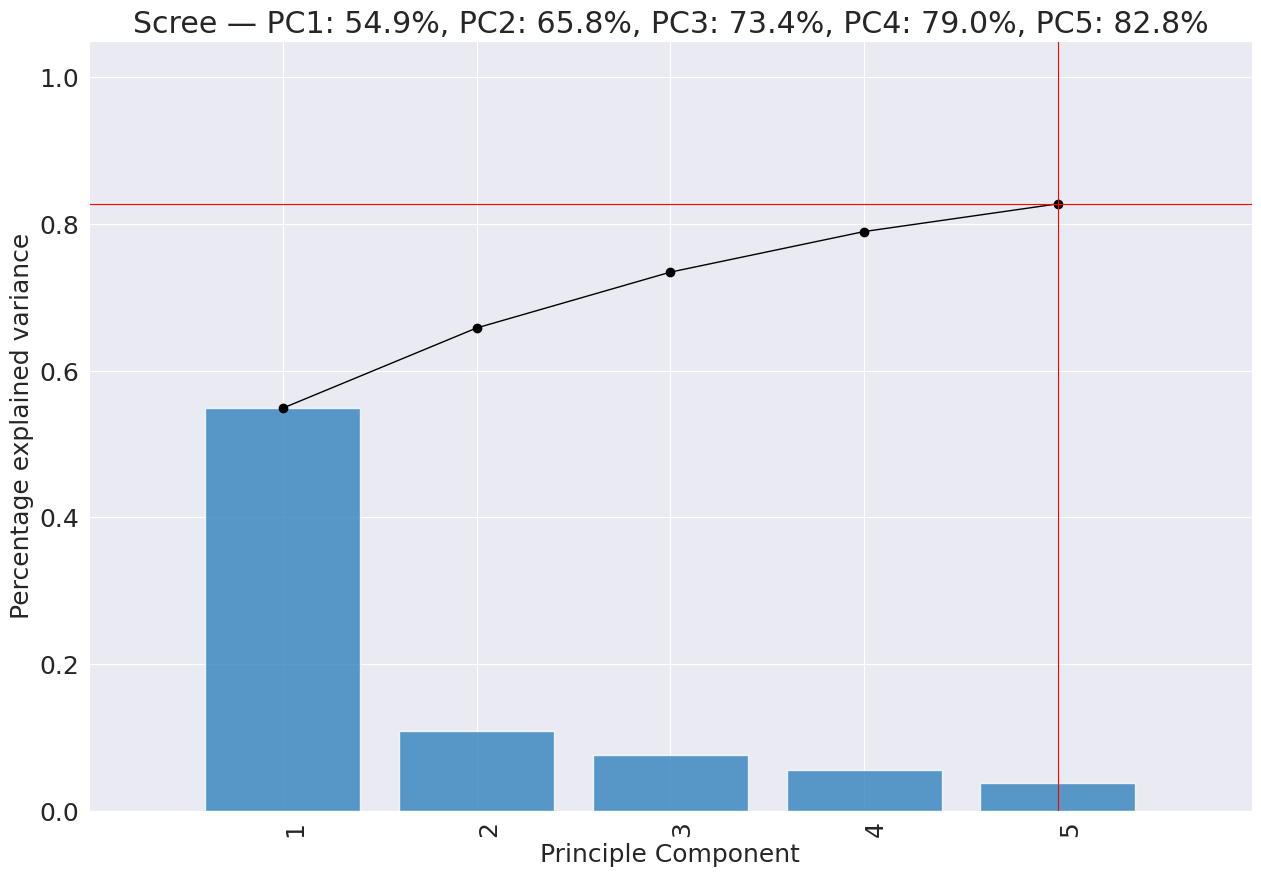

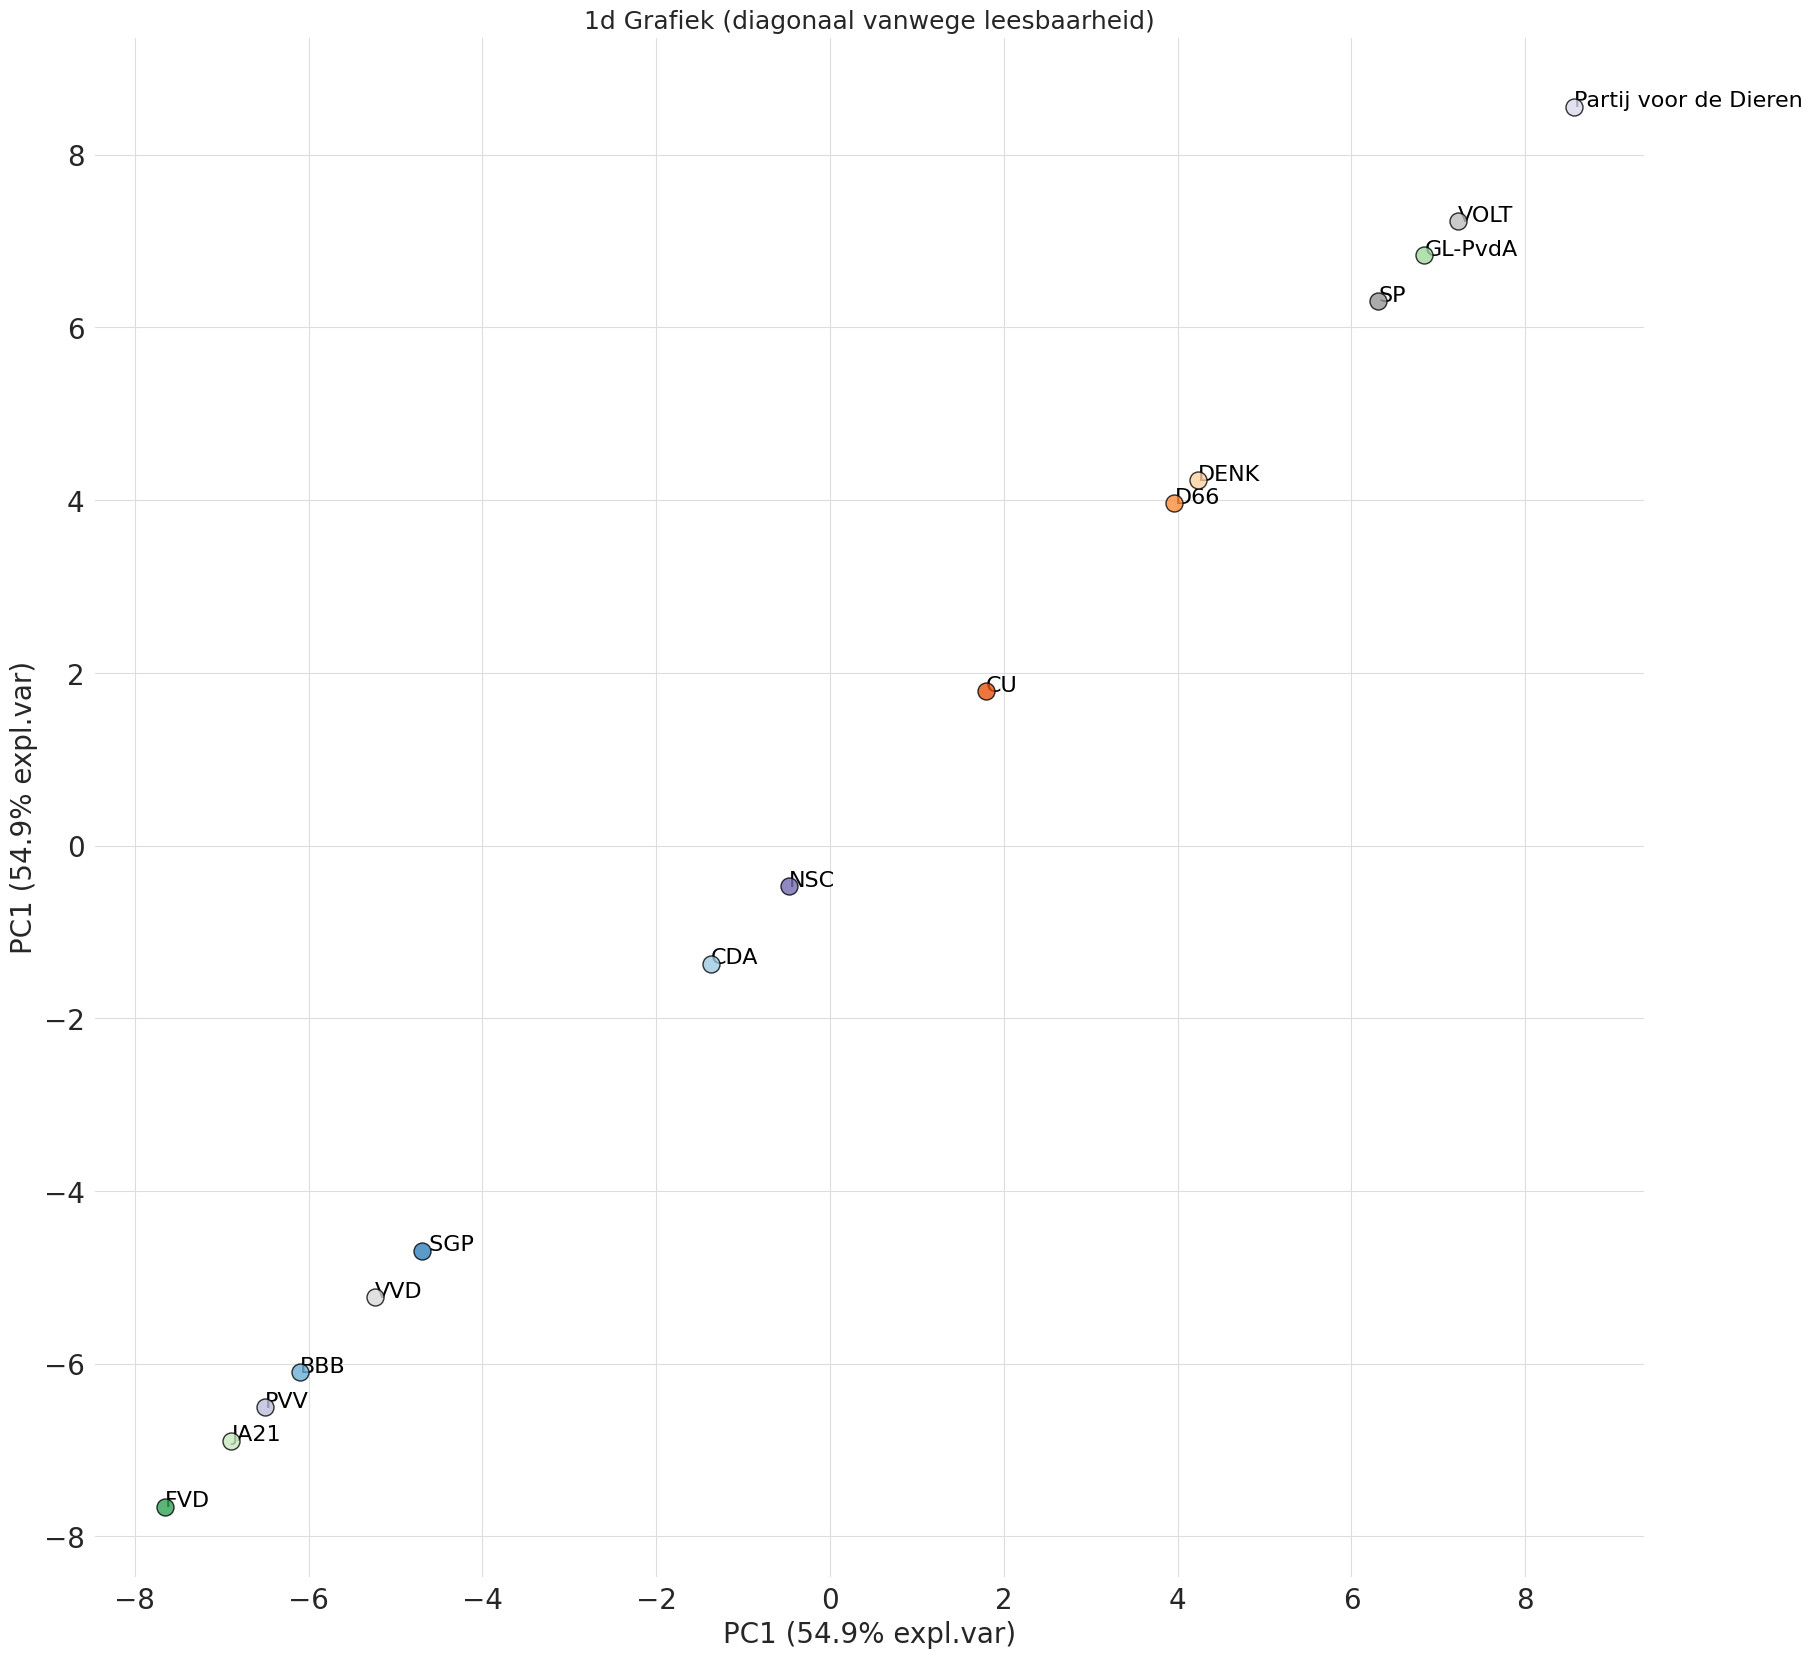

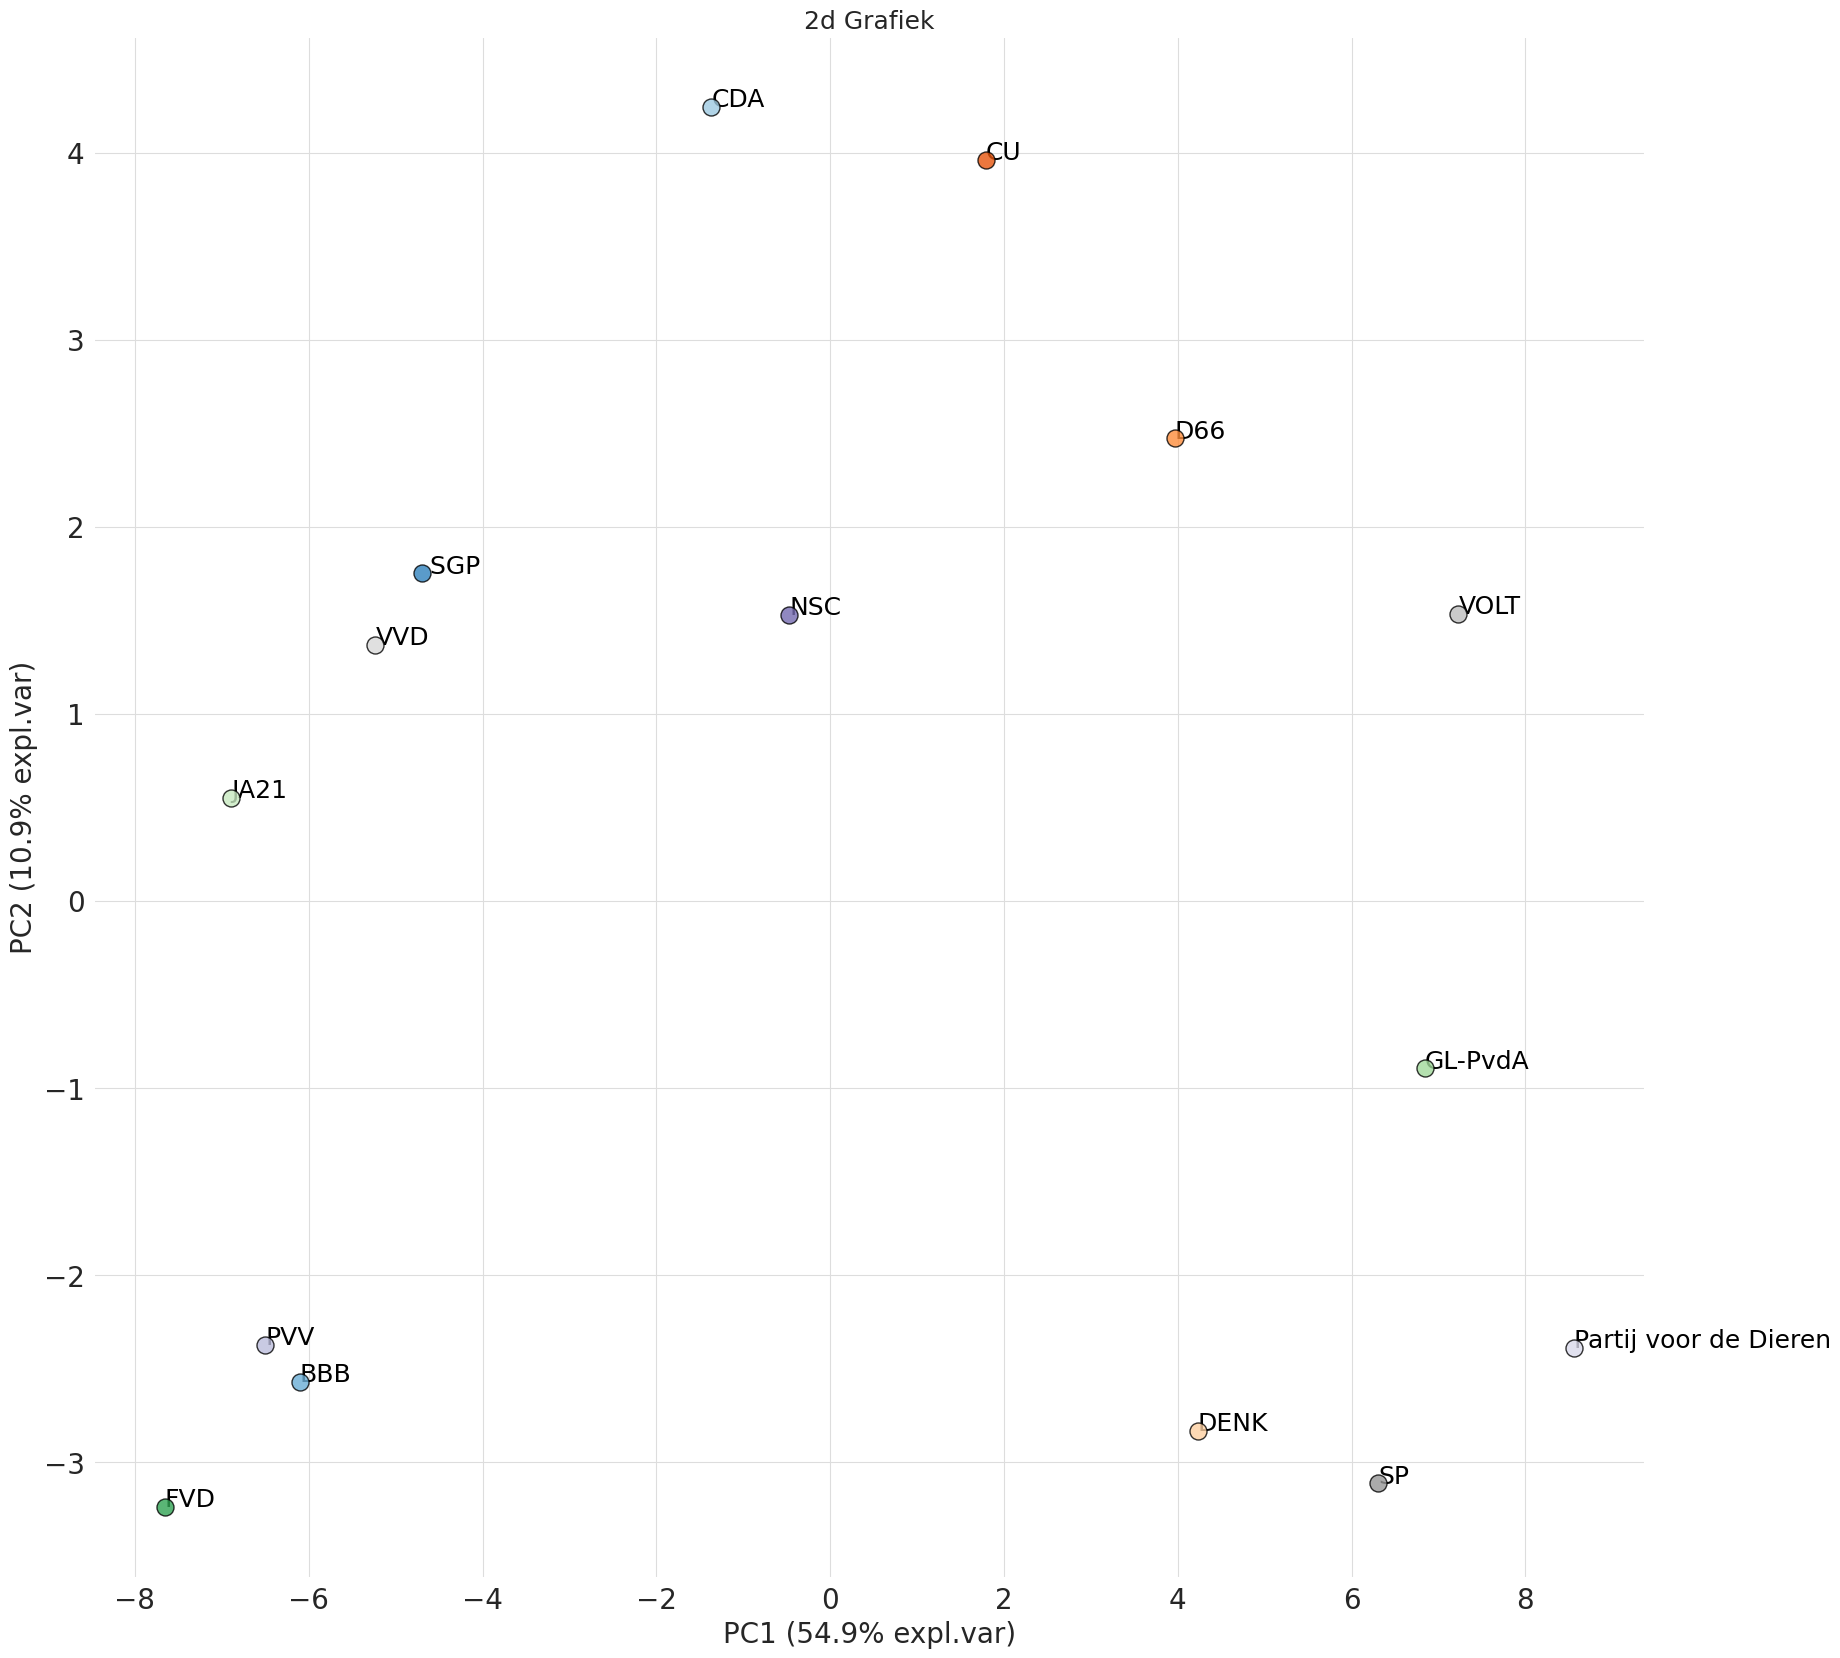

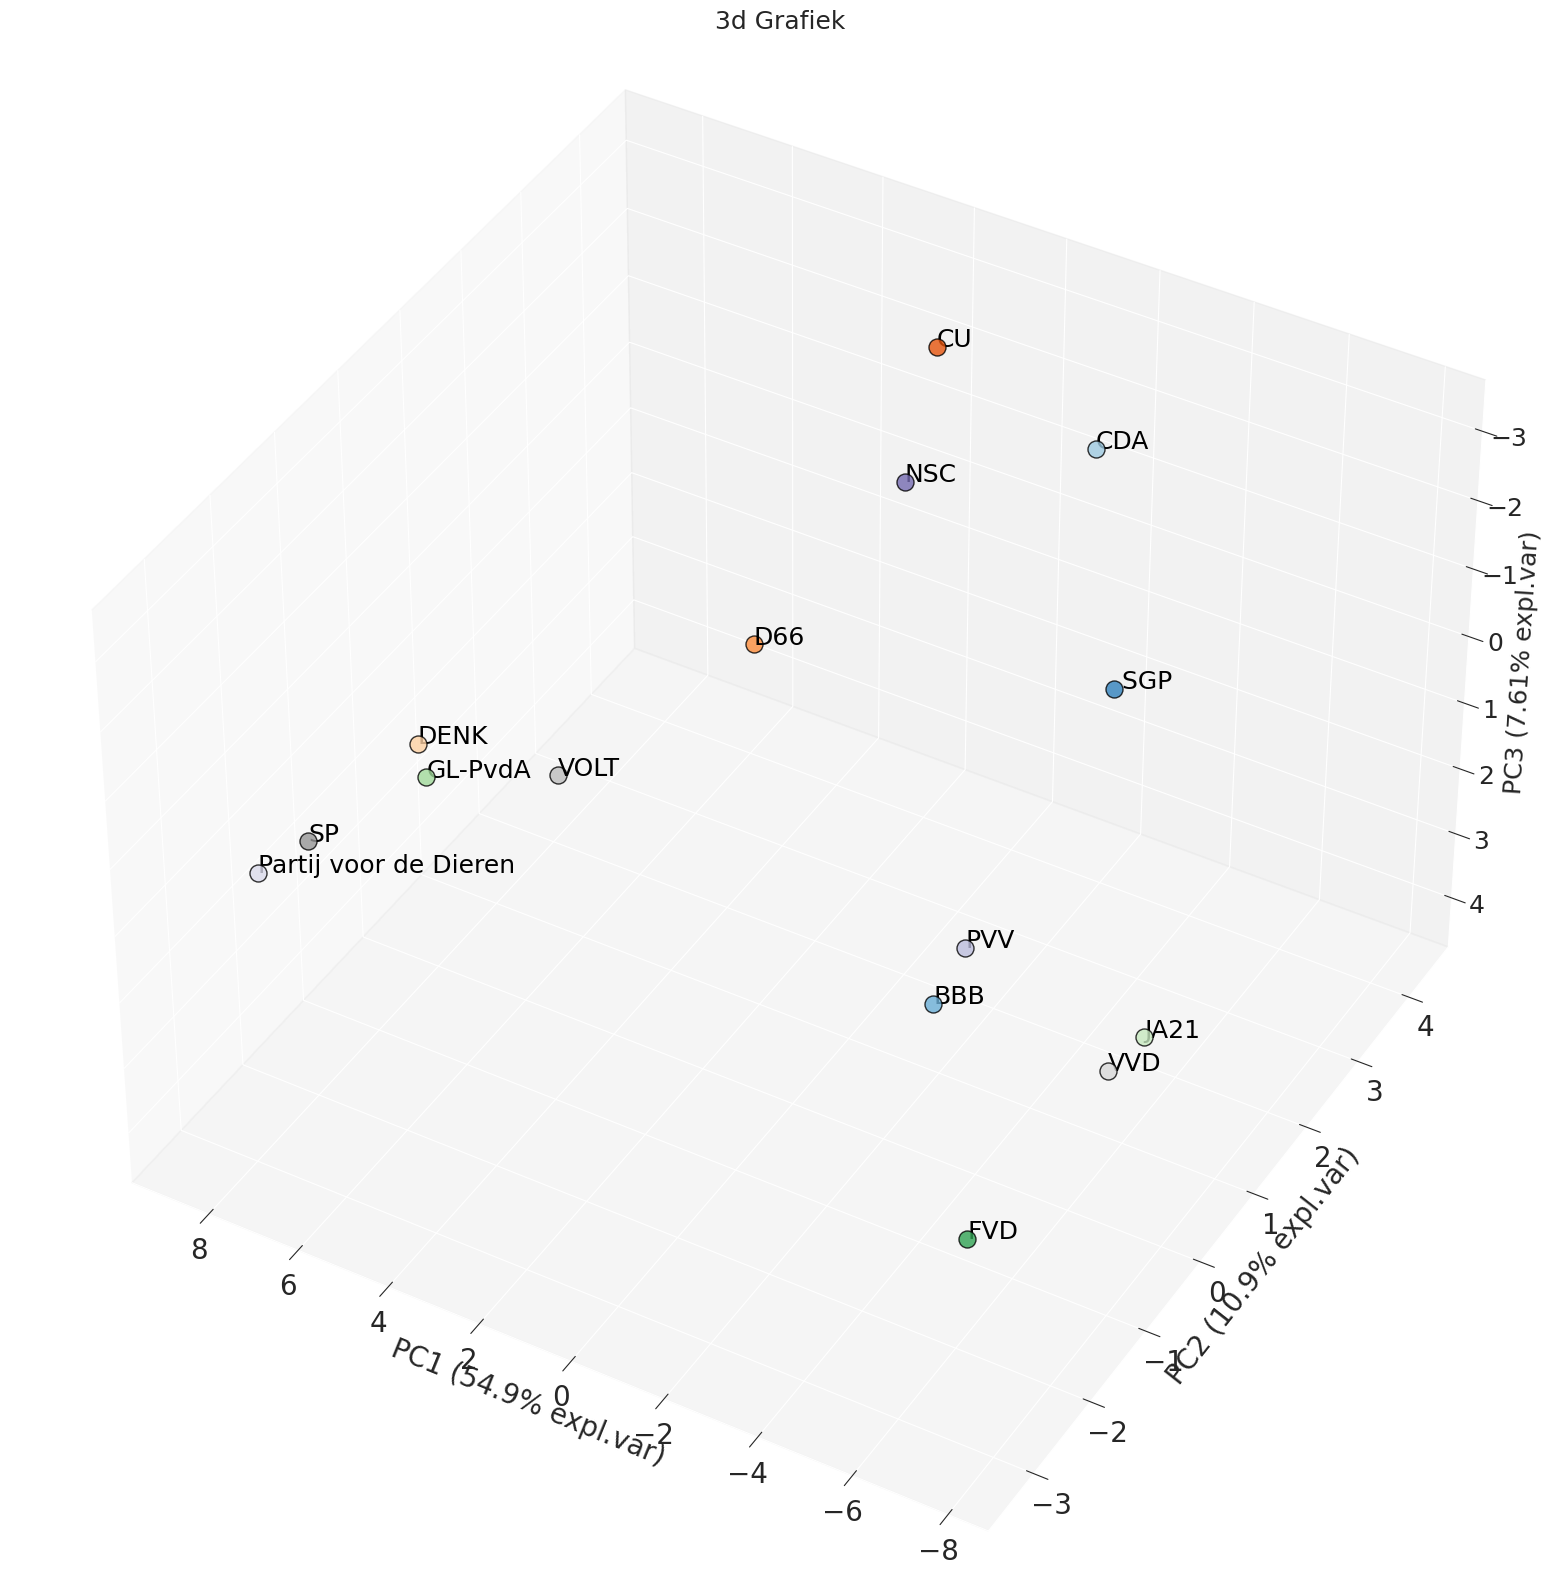

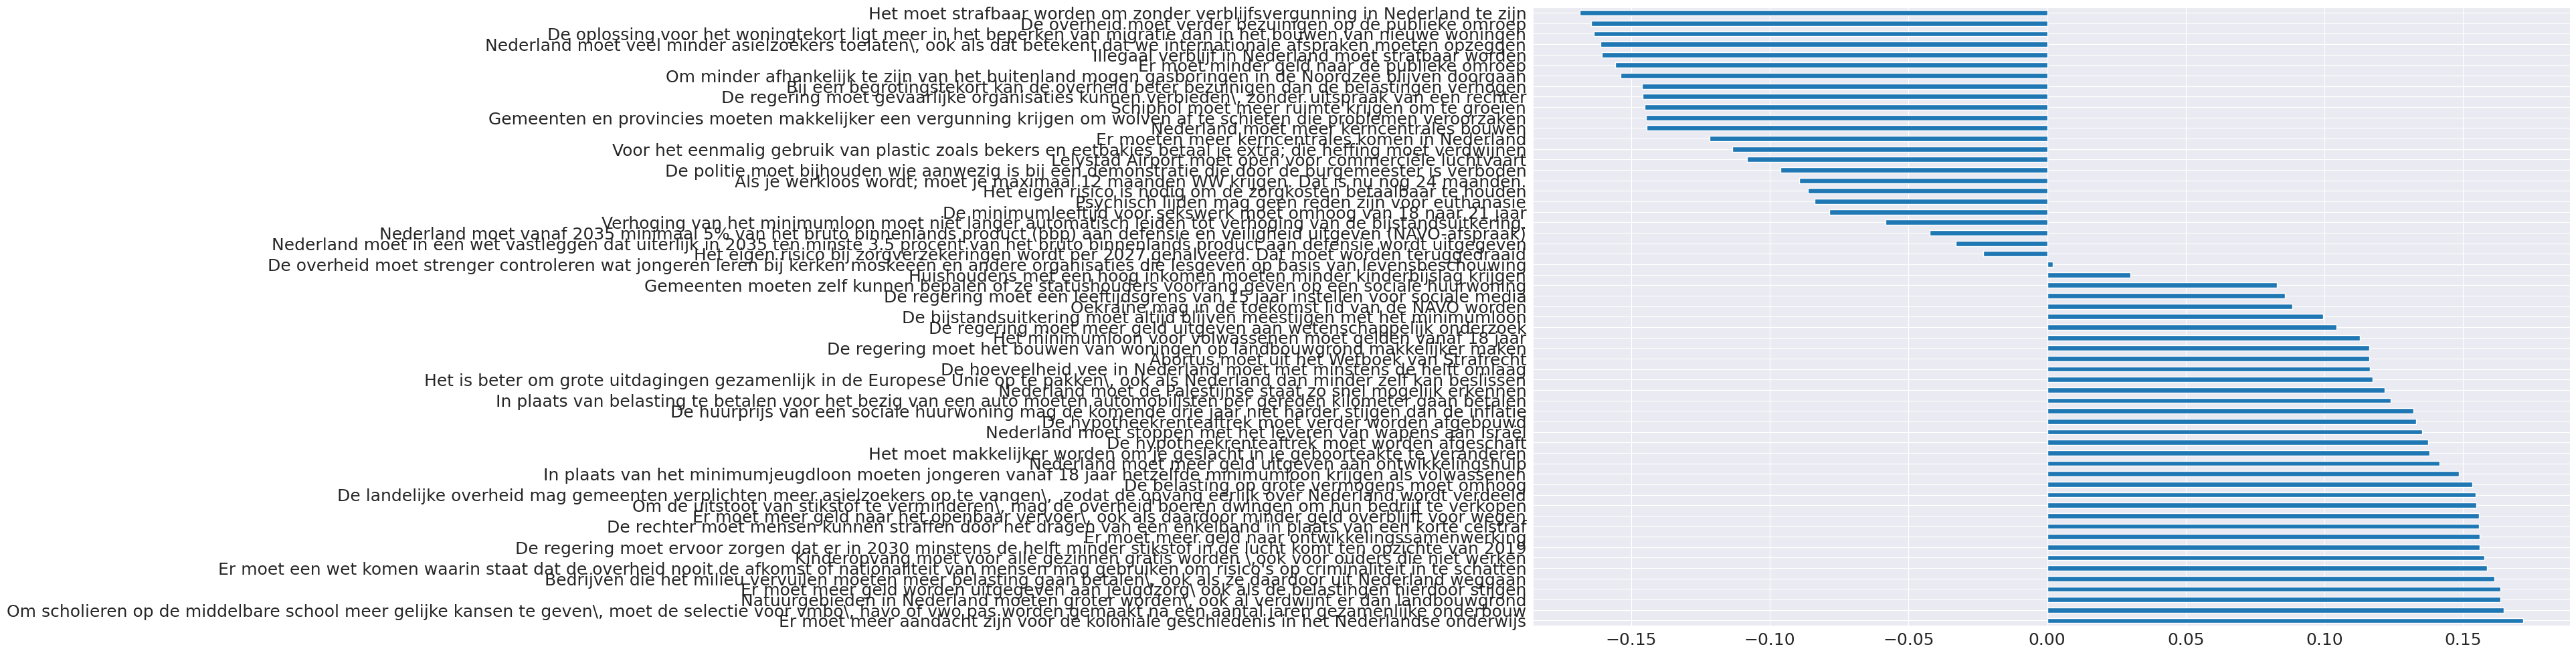

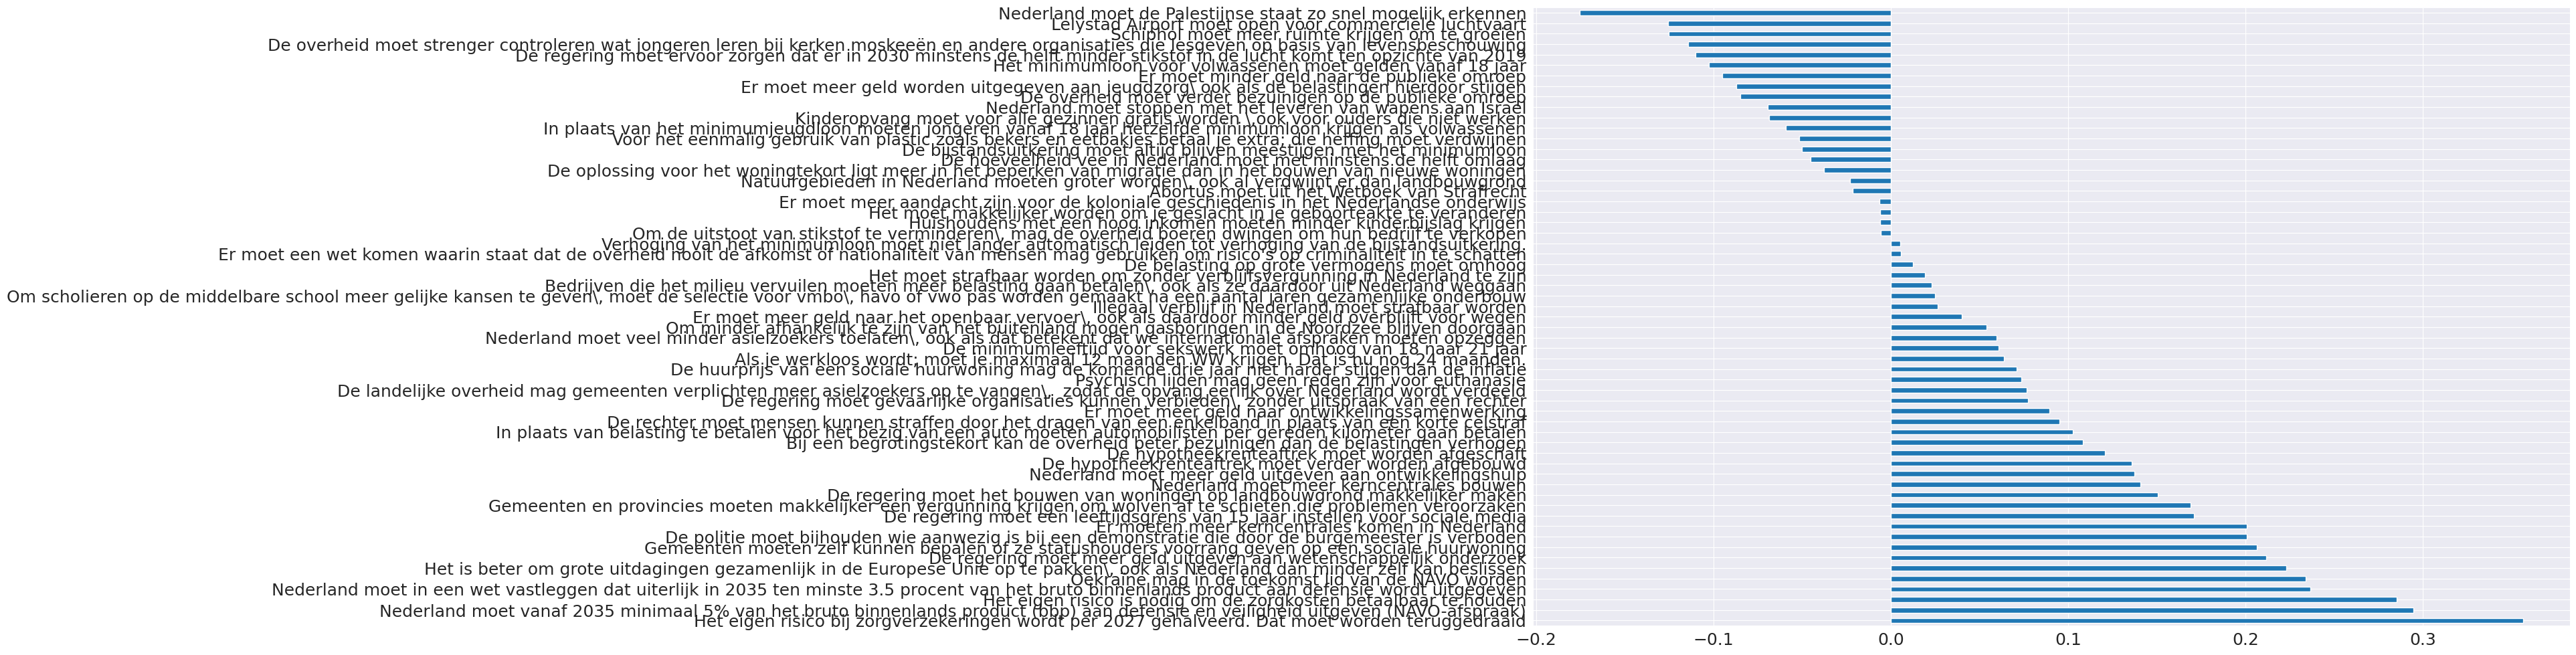

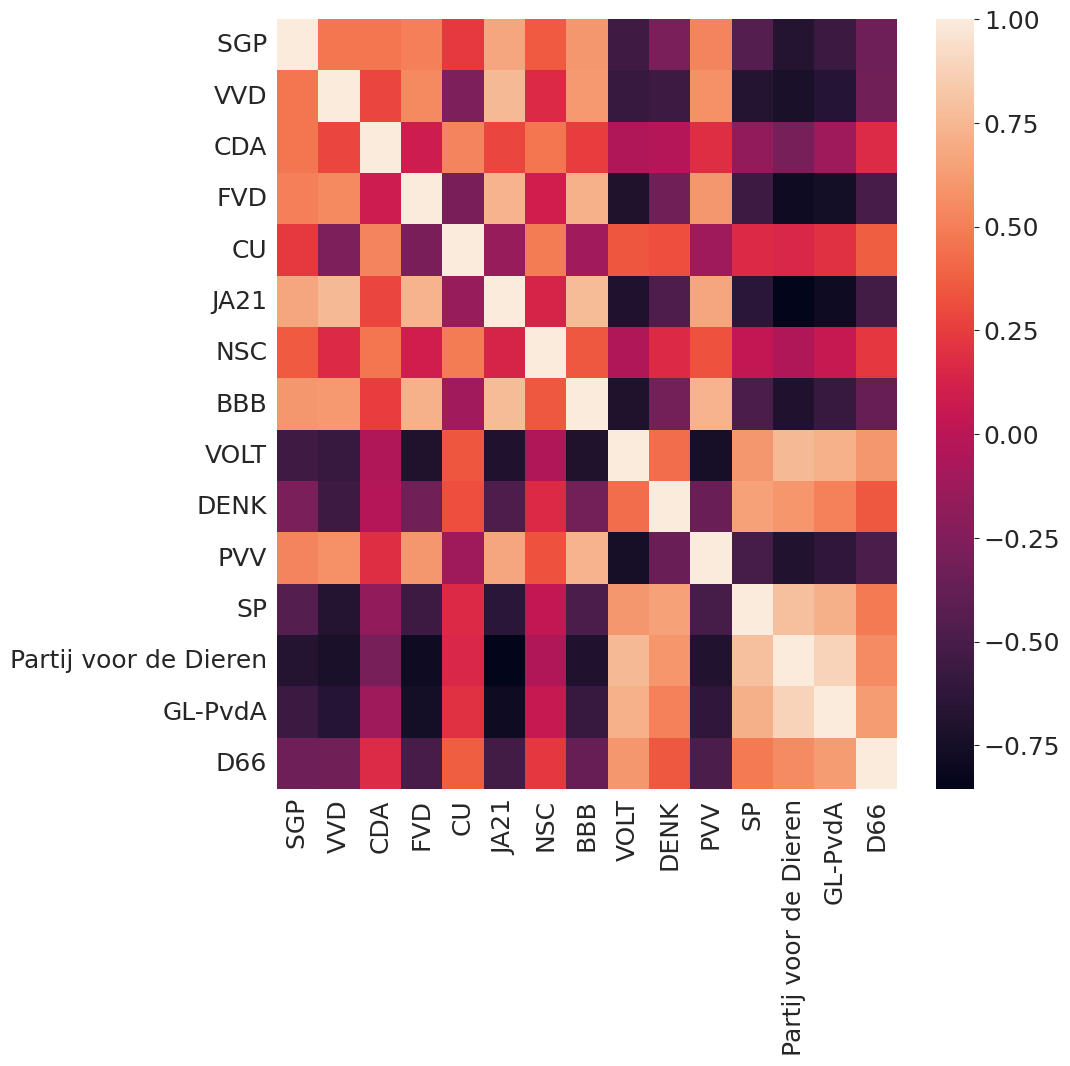

In [7]:
# Load data and prepare DataFrame for analysis
combined_df_prepared, combined_df, combined_df_labels = prepare_data(
    file_location='data/combined.csv',
    question_string="stelling"
)
run_analysis(combined_df, combined_df_prepared, combined_df_labels)
combined_df.corr()

# Kieskompas

[scatterd] >INFO> Create scatterplot


[pca] >Extracting column labels from dataframe.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [29] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
[pca] >Extracting column labels from dataframe.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [29] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/D

[scatterd] >INFO> Create scatterplot
[scatterd] >INFO> Create scatterplot


[pca] >Extracting column labels from dataframe.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [29] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
[pca] >Extracting column labels from dataframe.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [29] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/D

/tmp/ipykernel_44184/1278191467.py:32: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


[pca] >Extracting column labels from dataframe.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [29] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


/tmp/ipykernel_44184/1278191467.py:32: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


SGP       VVD       CDA       FVD        CU  \
SGP                    1.000000  0.570008  0.462355  0.538797  0.260131   
VVD                    0.570008  1.000000  0.392250  0.681748 -0.235229   
CDA                    0.462355  0.392250  1.000000  0.192470  0.465618   
FVD                    0.538797  0.681748  0.192470  1.000000 -0.262033   
CU                     0.260131 -0.235229  0.465618 -0.262033  1.000000   
JA21                   0.706231  0.788815  0.330160  0.789009 -0.186748   
NSC                    0.476449  0.218624  0.500445  0.170479  0.546654   
BBB                    0.713630  0.762037  0.298360  0.823143 -0.147920   
VOLT                  -0.638112 -0.652429 -0.120136 -0.774520  0.375487   
DENK                  -0.380504 -0.690650 -0.166412 -0.409981  0.398957   
PVV                    0.649473  0.696880  0.242907  0.677803 -0.157107   
SP                    -0.531603 -0.841214 -0.348944 -0.574701  0.187506   
Partij voor de Dieren -0.715282 -0.871511 -0.363623 -0.823666  0.215658   
GL-PvdA               -0.608603 -0.729927 -0.170966 -0.818275  0.221713   
D66                   -0.453245 -0.432511  0.069455 -0.593479  0.391231   

                           JA21       NSC       BBB      VOLT      DENK  \
SGP                    0.706231  0.476449  0.713630 -0.638112 -0.380504   
VVD                    0.788815  0.218624  0.762037 -0.652429 -0.690650   
CDA                    0.330160  0.500445  0.298360 -0.120136 -0.166412   
FVD                    0.789009  0.170479  0.823143 -0.774520 -0.409981   
CU                    -0.186748  0.546654 -0.147920  0.375487  0.398957   
JA21                   1.000000  0.138054  0.857189 -0.780532 -0.625095   
NSC                    0.138054  1.000000  0.327776  0.002467  0.061050   
BBB                    0.857189  0.327776  1.000000 -0.835839 -0.449504   
VOLT                  -0.780532  0.002467 -0.835839  1.000000  0.453141   
DENK                  -0.625095  0.061050 -0.449504  0.453141  1.000000   
PVV                    0.786440  0.311651  0.780875 -0.750748 -0.440562   
SP                    -0.751323 -0.039702 -0.641140  0.631771  0.675725   
Partij voor de Dieren -0.947292 -0.116621 -0.839418  0.804512  0.668628   
GL-PvdA               -0.880841  0.054887 -0.770273  0.778468  0.550487   
D66                   -0.671390  0.154350 -0.606301  0.758933  0.340376   

                            PVV        SP  Partij voor de Dieren   GL-PvdA  \
SGP                    0.649473 -0.531603              -0.715282 -0.608603   
VVD                    0.696880 -0.841214              -0.871511 -0.729927   
CDA                    0.242907 -0.348944              -0.363623 -0.170966   
FVD                    0.677803 -0.574701              -0.823666 -0.818275   
CU                    -0.157107  0.187506               0.215658  0.221713   
JA21                   0.786440 -0.751323              -0.947292 -0.880841   
NSC                    0.311651 -0.039702              -0.116621  0.054887   
BBB                    0.780875 -0.641140              -0.839418 -0.770273   
VOLT                  -0.750748  0.631771               0.804512  0.778468   
DENK                  -0.440562  0.675725               0.668628  0.550487   
PVV                    1.000000 -0.557019              -0.766906 -0.711811   
SP                    -0.557019  1.000000               0.832888  0.747766   
Partij voor de Dieren -0.766906  0.832888               1.000000  0.901561   
GL-PvdA               -0.711811  0.747766               0.901561  1.000000   
D66                   -0.656207  0.460072               0.645733  0.704261   

                            D66  
SGP                   -0.453245  
VVD                   -0.432511  
CDA                    0.069455  
FVD                   -0.593479  
CU                     0.391231  
JA21                  -0.671390  
NSC                    0.154350  
BBB                   -0.606301  
VOLT                   0.758933  
DENK                   0.340376  
PVV

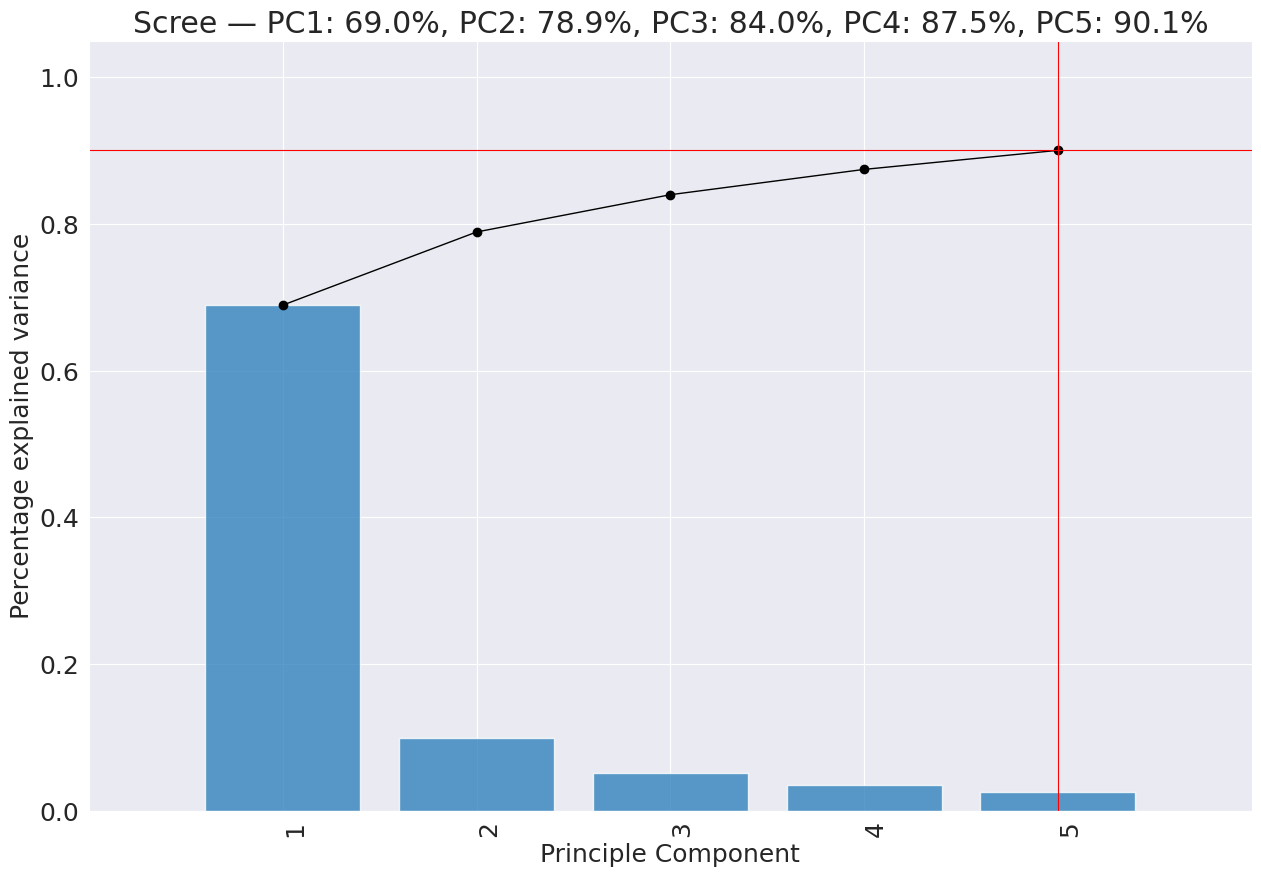

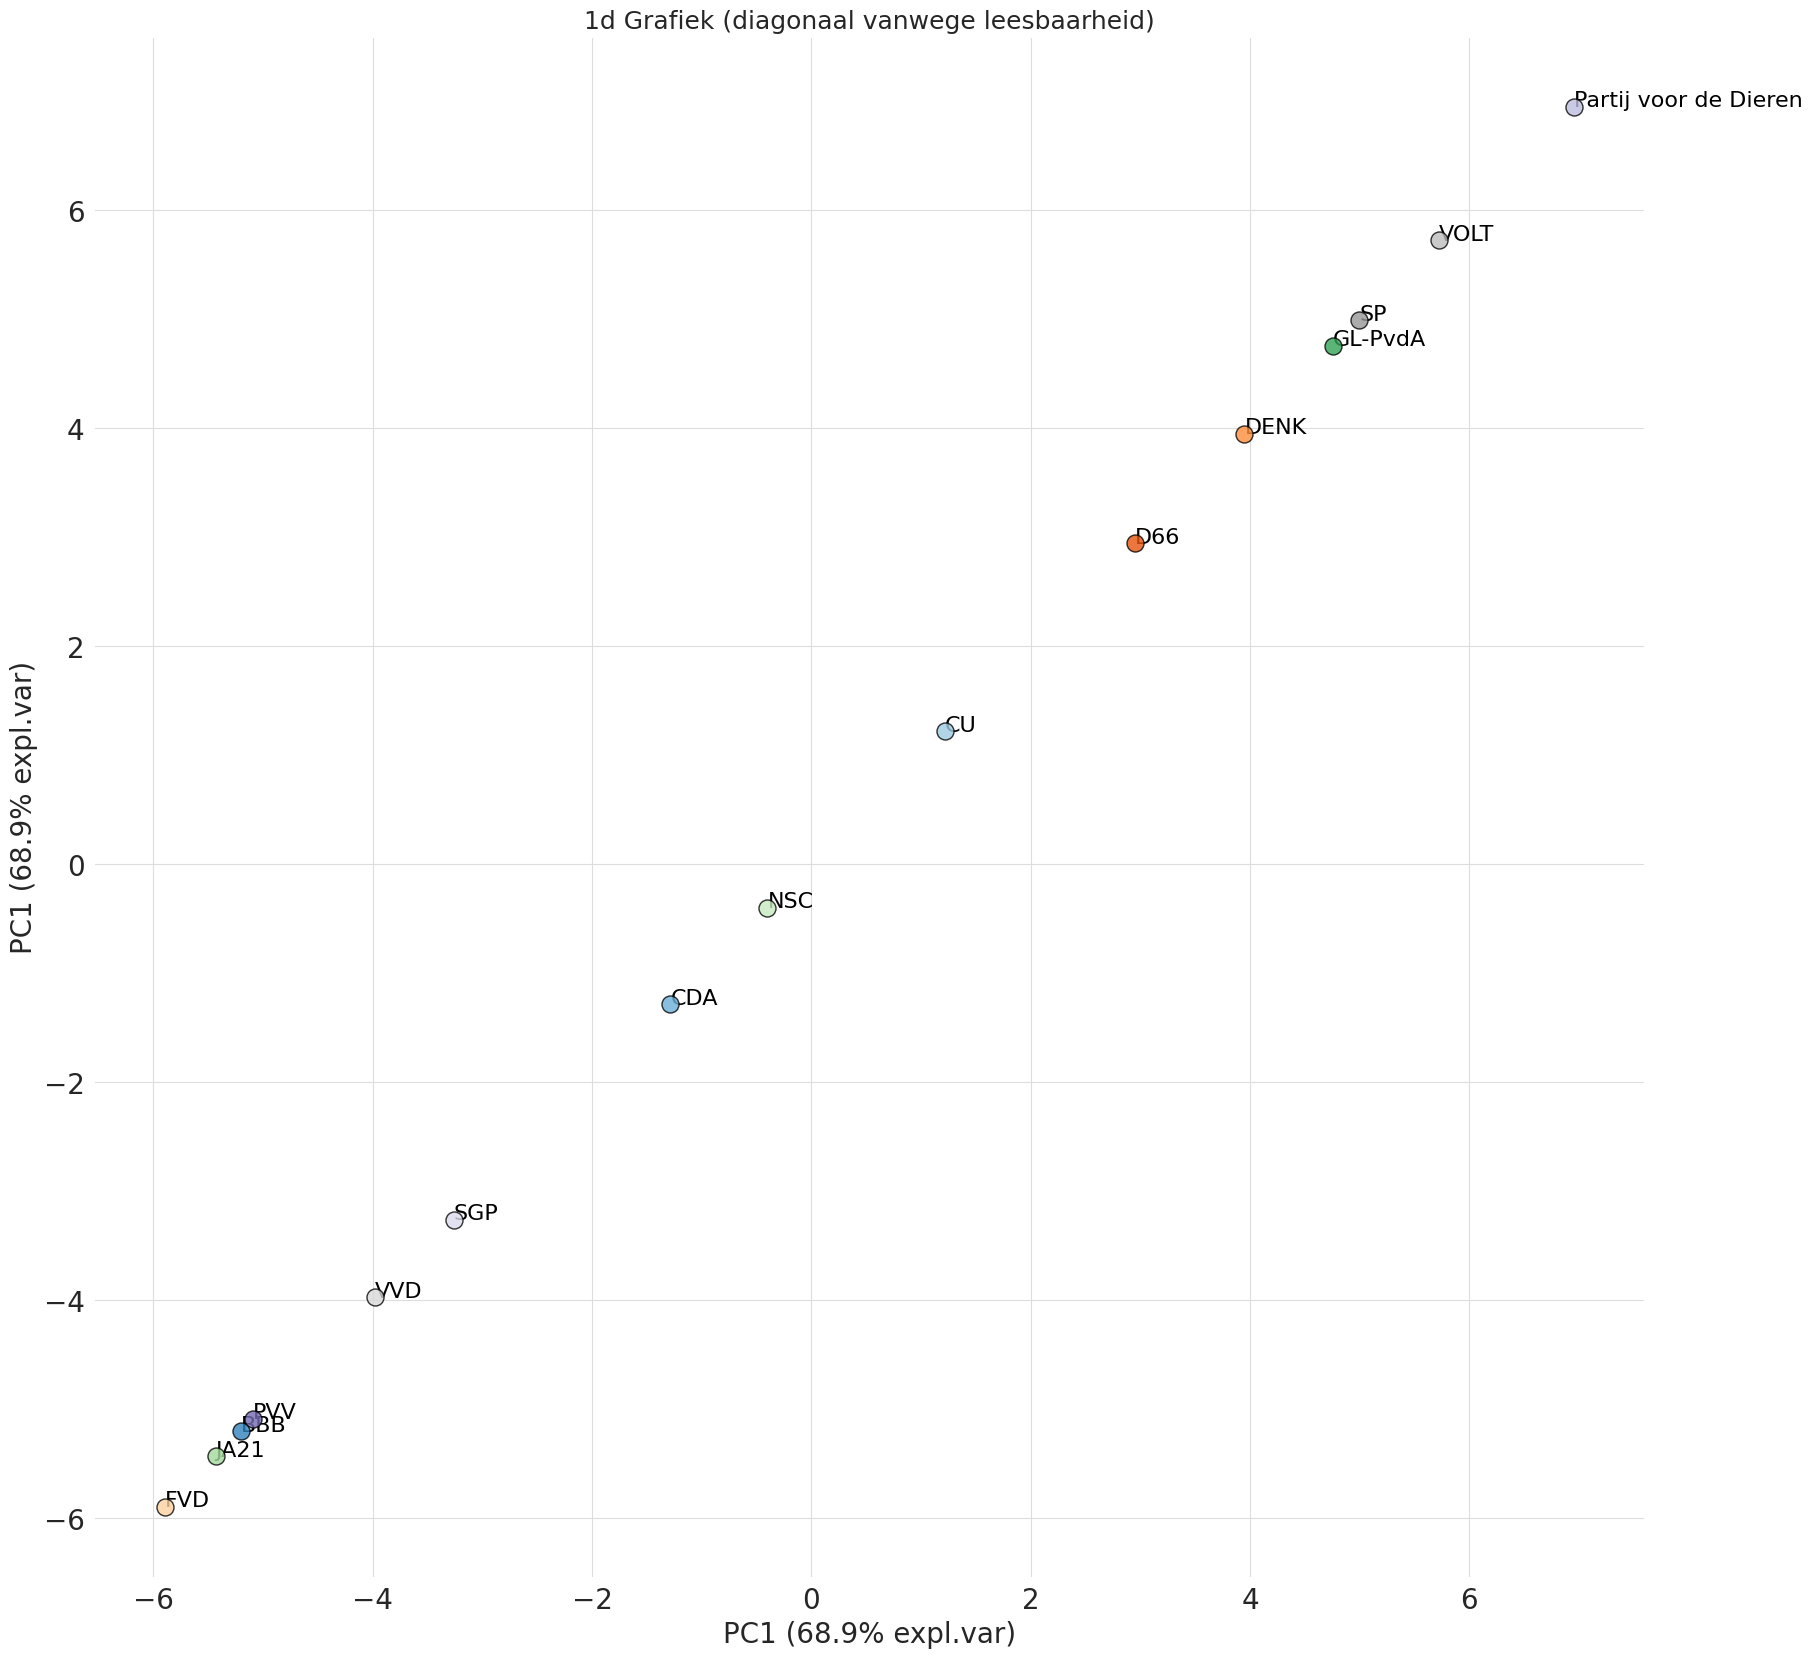

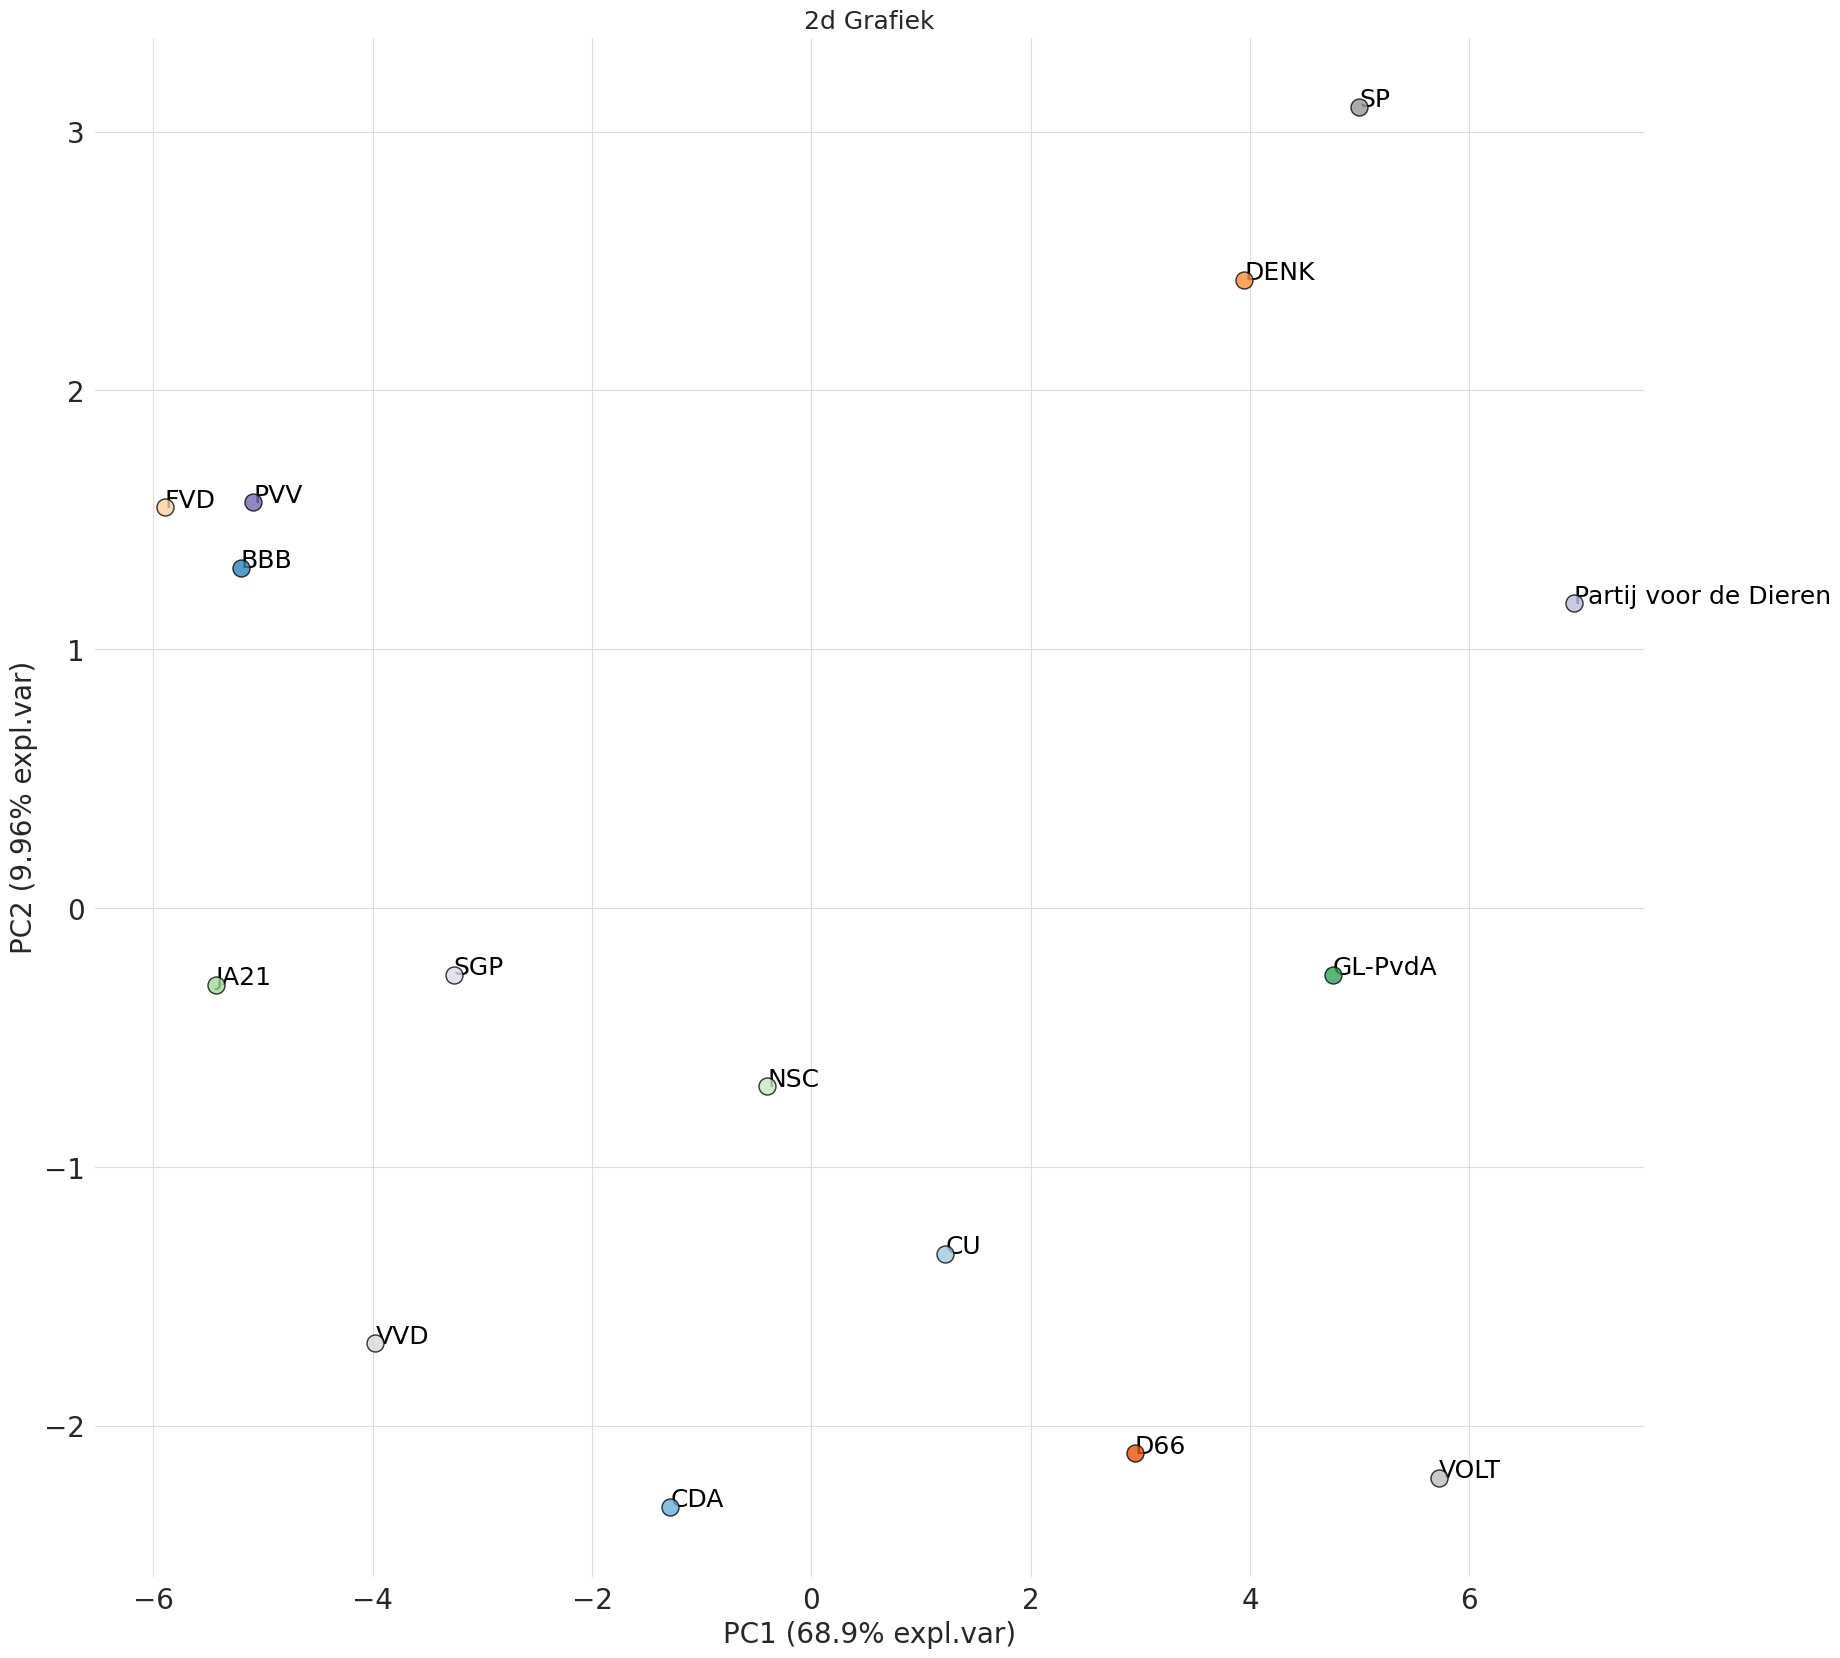

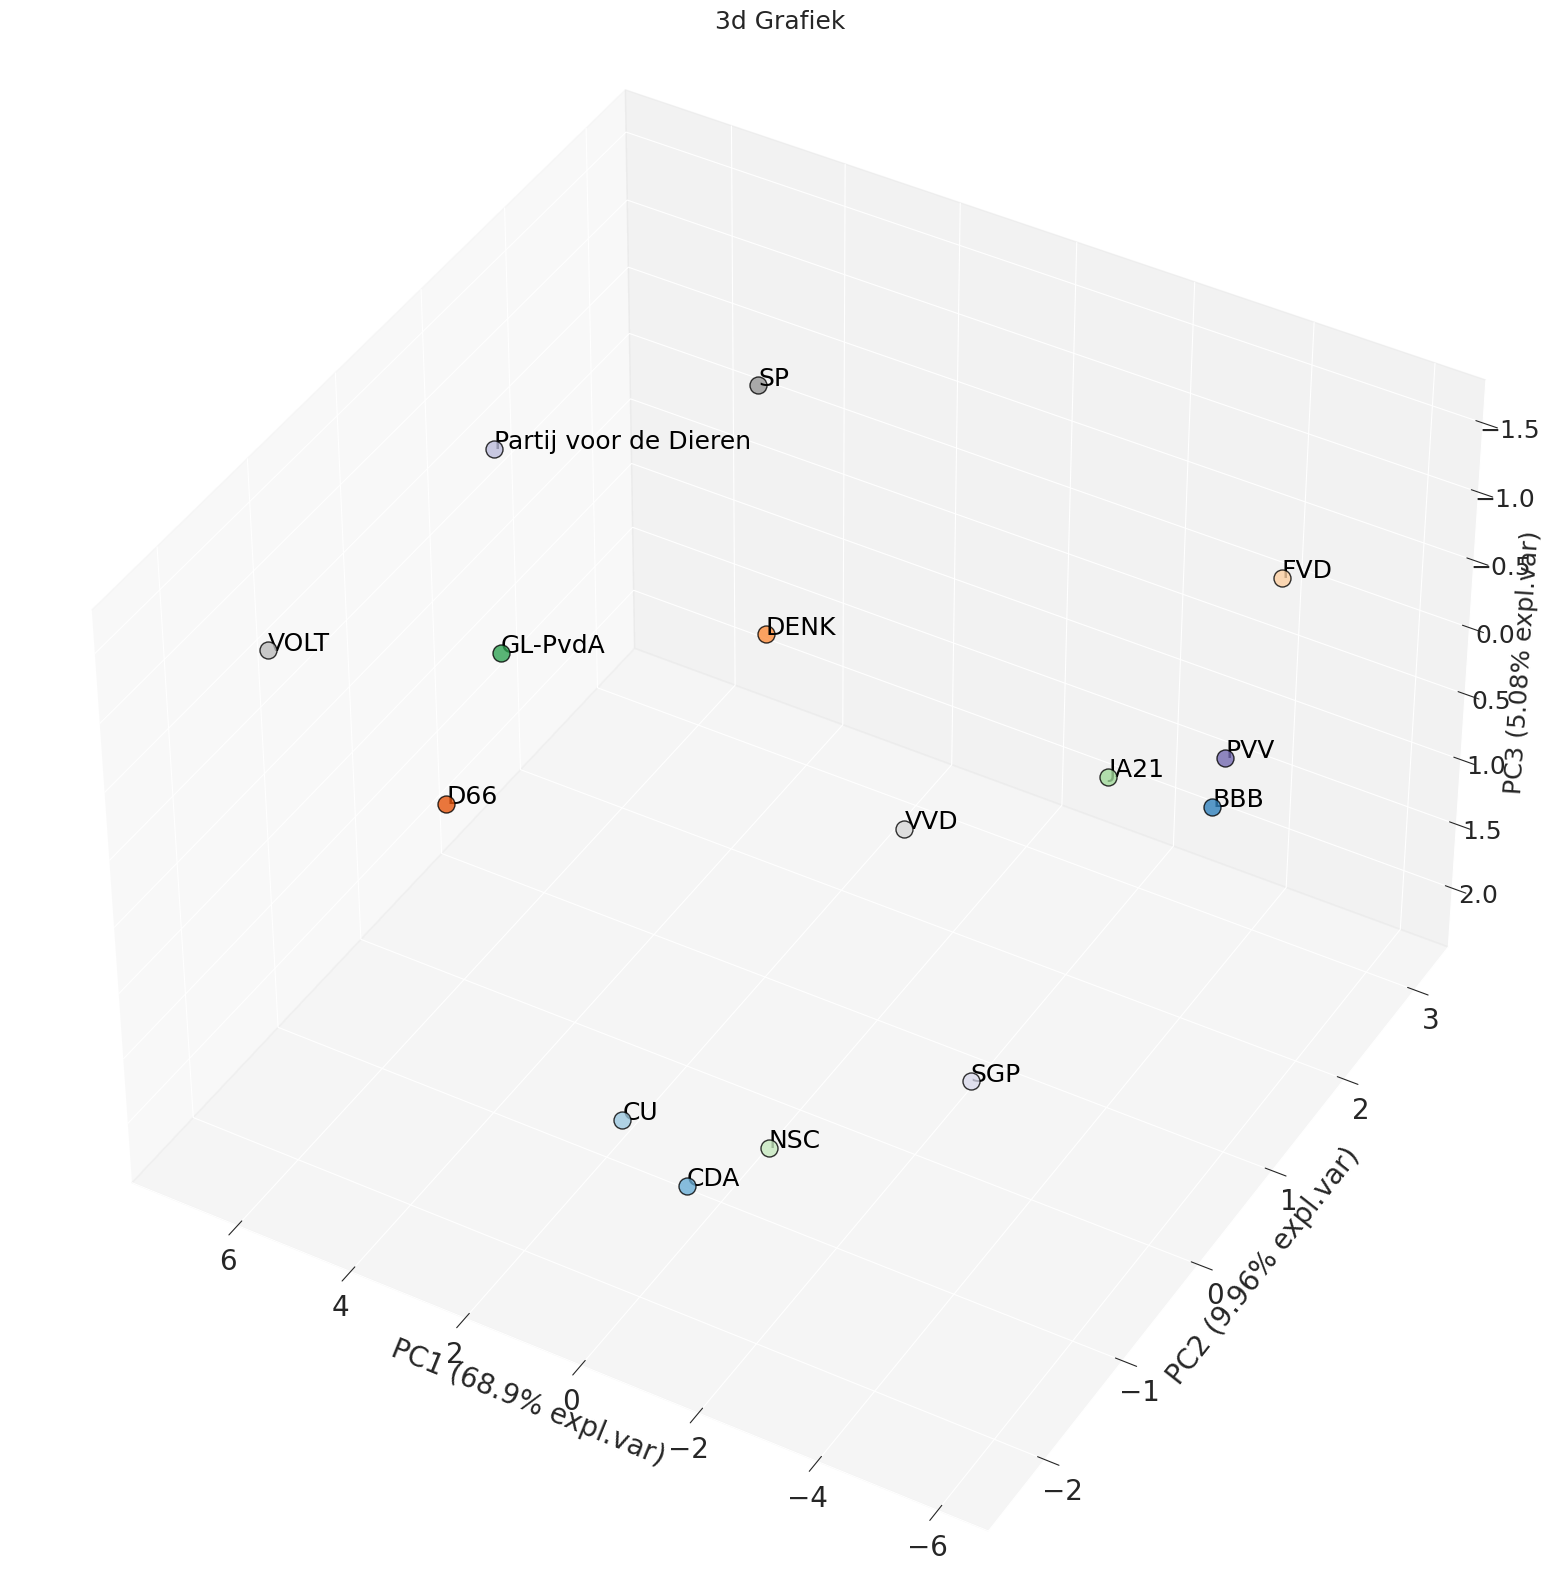

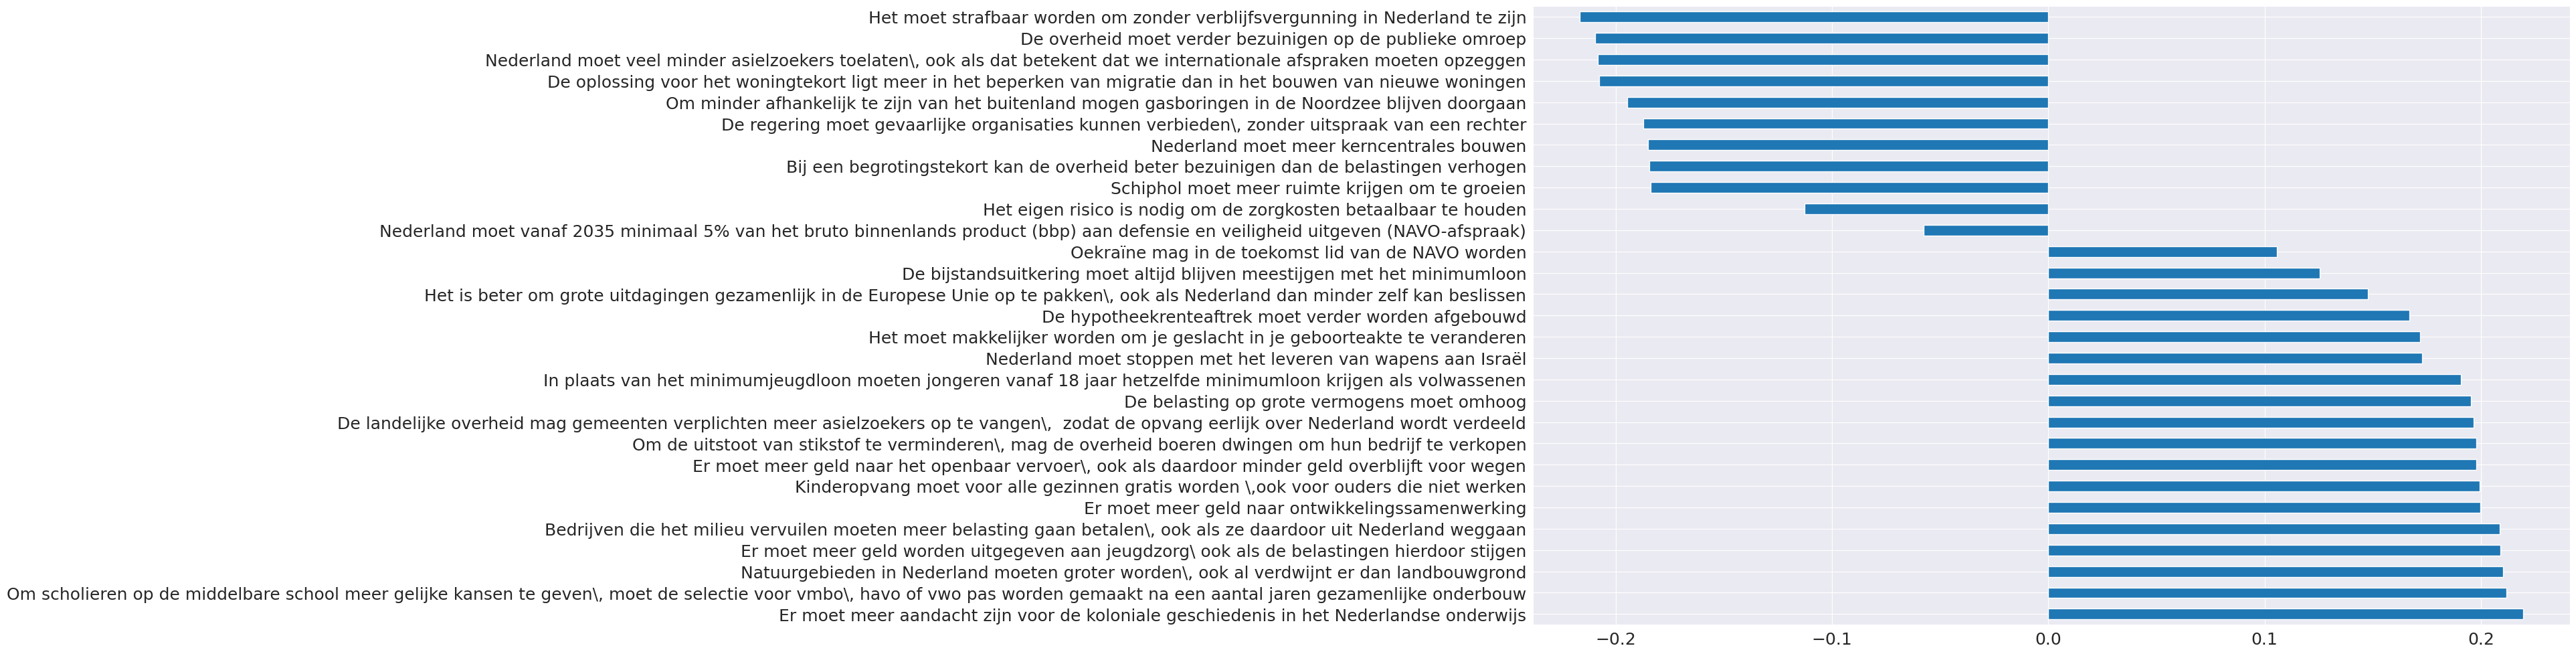

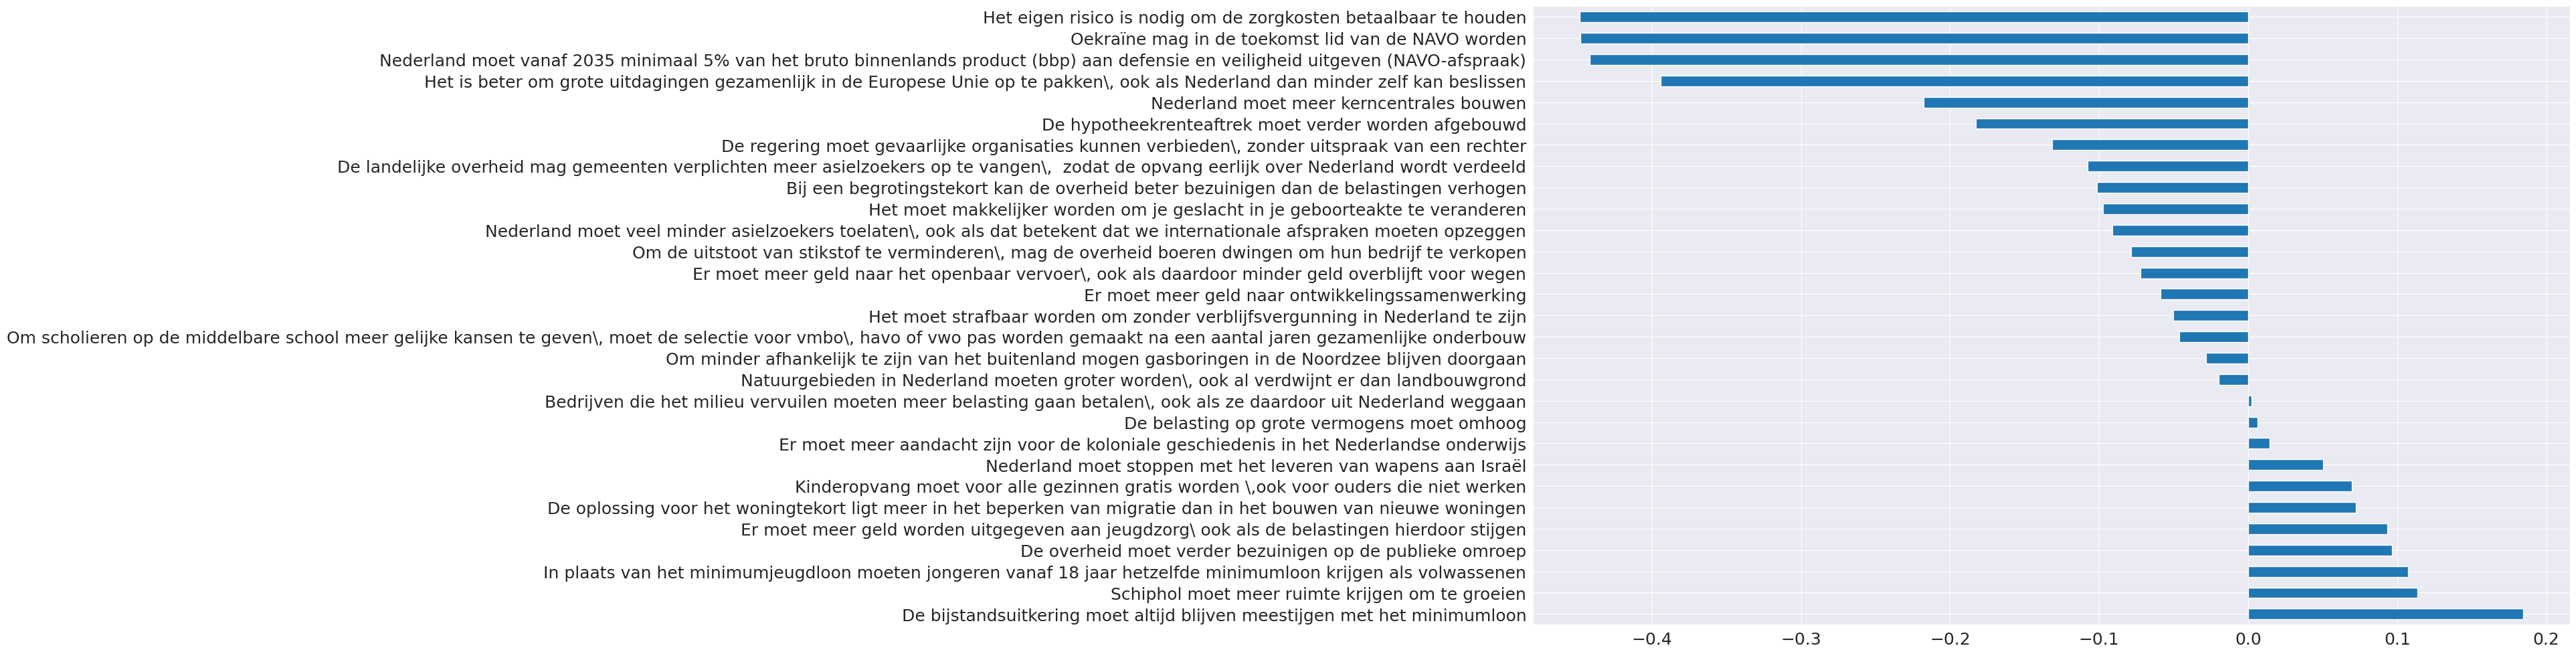

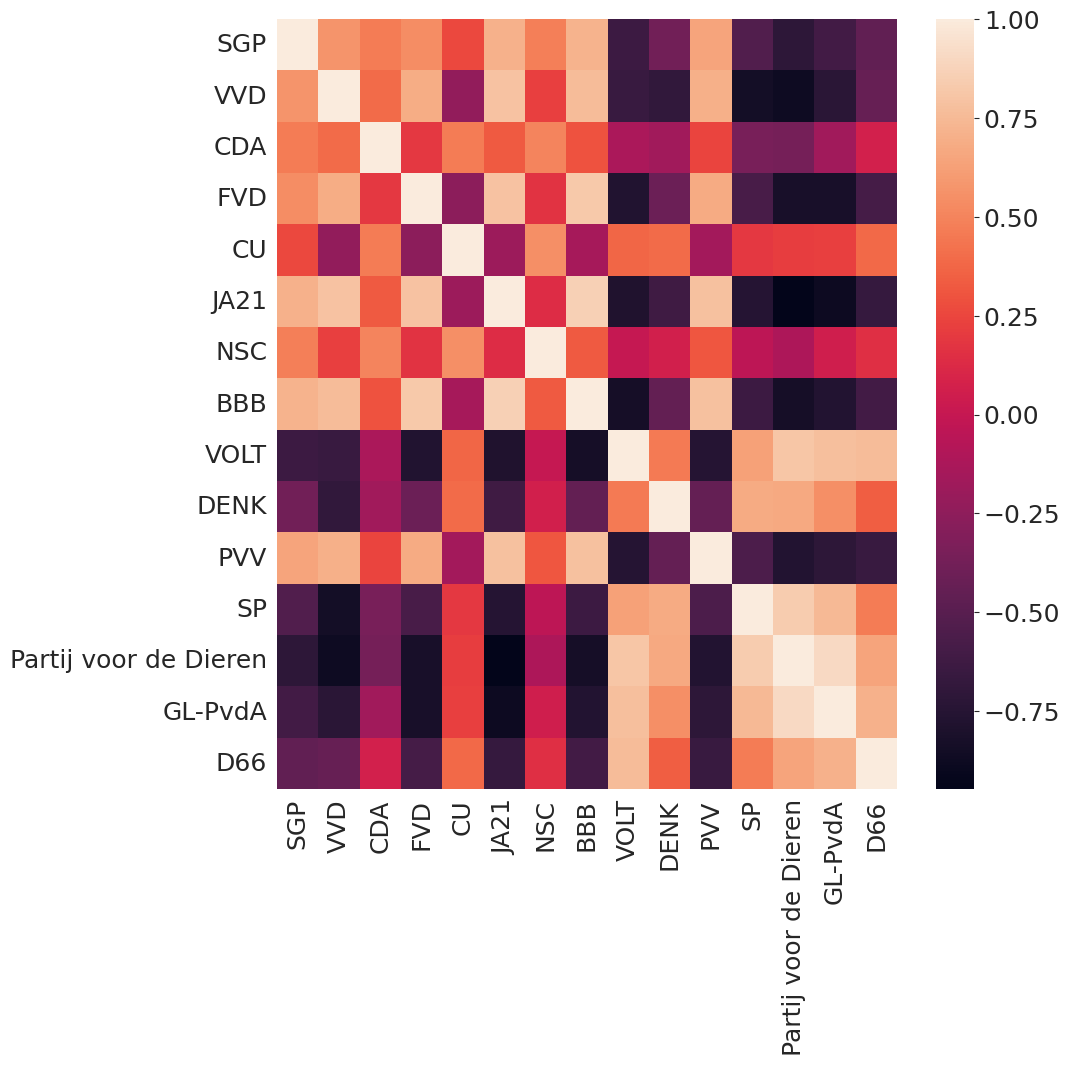

In [8]:
# Load data and prepare DataFrame for analysis
kieskompas_df_prepared, kieskompas_df, kieskompas_df_labels = prepare_data(
    file_location='data/kieskompas.csv',
    question_string="stelling (-2 helemaal mee oneens; -1 oneens; 0=neutraal; 1 eens; 2 helemaal mee eens)"
)
run_analysis(kieskompas_df, kieskompas_df_prepared, kieskompas_df_labels)
kieskompas_df.corr()

# Stemwijzer

[scatterd] >INFO> Create scatterplot


[pca] >Extracting column labels from dataframe.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [29] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
[pca] >Extracting column labels from dataframe.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [29] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/D

[scatterd] >INFO> Create scatterplot


[pca] >Extracting column labels from dataframe.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [29] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


[scatterd] >INFO> Create scatterplot


[pca] >Extracting column labels from dataframe.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [29] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


/tmp/ipykernel_44184/1278191467.py:32: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


[pca] >Extracting column labels from dataframe.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [29] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


/tmp/ipykernel_44184/1278191467.py:32: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


SGP       VVD       CDA       FVD        CU  \
SGP                    1.000000  0.247866  0.535484  0.414240  0.247866   
VVD                    0.247866  1.000000  0.169100  0.223906 -0.279412   
CDA                    0.535484  0.169100  1.000000 -0.098082  0.589434   
FVD                    0.414240  0.223906 -0.098082  1.000000 -0.353273   
CU                     0.247866 -0.279412  0.589434 -0.353273  1.000000   
JA21                   0.581210  0.701979  0.279179  0.525026 -0.083745   
NSC                    0.141208  0.035187  0.495438 -0.094393  0.472511   
BBB                    0.362493  0.260927  0.200594  0.397276 -0.041748   
VOLT                  -0.332992 -0.421569  0.028989 -0.497568  0.289216   
DENK                  -0.070450 -0.344832  0.213633 -0.090005  0.226604   
PVV                    0.221413  0.298033  0.143231  0.345017 -0.059114   
SP                    -0.249235 -0.309211  0.104762 -0.470792  0.111123   
Partij voor de Dieren -0.609514 -0.391345 -0.242857 -0.666955  0.028989   
GL-PvdA               -0.478206 -0.563725 -0.111123 -0.641863  0.147059   
D66                   -0.146962 -0.146689  0.261353 -0.389418  0.344155   

                           JA21       NSC       BBB      VOLT      DENK  \
SGP                    0.581210  0.141208  0.362493 -0.332992 -0.070450   
VVD                    0.701979  0.035187  0.260927 -0.421569 -0.344832   
CDA                    0.279179  0.495438  0.200594  0.028989  0.213633   
FVD                    0.525026 -0.094393  0.397276 -0.497568 -0.090005   
CU                    -0.083745  0.472511 -0.041748  0.289216  0.226604   
JA21                   1.000000  0.094716  0.485098 -0.440892 -0.102723   
NSC                    0.094716  1.000000  0.398675 -0.110588  0.344767   
BBB                    0.485098  0.398675  1.000000 -0.344423  0.047199   
VOLT                  -0.440892 -0.110588 -0.344423  1.000000  0.369463   
DENK                  -0.102723  0.344767  0.047199  0.369463  1.000000   
PVV                    0.292079  0.344767  0.579496 -0.701979 -0.112624   
SP                    -0.349580  0.222947 -0.051434  0.531457  0.631187   
Partij voor de Dieren -0.565641  0.136246 -0.246885  0.589434  0.424837   
GL-PvdA               -0.583751  0.108074 -0.193086  0.573529  0.440892   
D66                   -0.289157  0.373163  0.030031  0.344155  0.371369   

                            PVV        SP  Partij voor de Dieren   GL-PvdA  \
SGP                    0.221413 -0.249235              -0.609514 -0.478206   
VVD                    0.298033 -0.309211              -0.391345 -0.563725   
CDA                    0.143231  0.104762              -0.242857 -0.111123   
FVD                    0.345017 -0.470792              -0.666955 -0.641863   
CU                    -0.059114  0.111123               0.028989  0.147059   
JA21                   0.292079 -0.349580              -0.565641 -0.583751   
NSC                    0.344767  0.222947               0.136246  0.108074   
BBB                    0.579496 -0.051434              -0.246885 -0.193086   
VOLT                  -0.701979  0.531457               0.589434  0.573529   
DENK                  -0.112624  0.631187               0.424837  0.440892   
PVV                    1.000000 -0.354436              -0.419982 -0.416261   
SP                    -0.354436  1.000000               0.657143  0.671568   
Partij voor de Dieren -0.419982  0.657143               1.000000  0.869657   
GL-PvdA               -0.416261  0.671568               0.869657  1.000000   
D66                   -0.204111  0.544949               0.422614  0.507770   

                            D66  
SGP                   -0.146962  
VVD                   -0.146689  
CDA                    0.261353  
FVD                   -0.389418  
CU                     0.344155  
JA21                  -0.289157  
NSC                    0.373163  
BBB                    0.030031  
VOLT                   0.344155  
DENK                   0.371369  
PVV

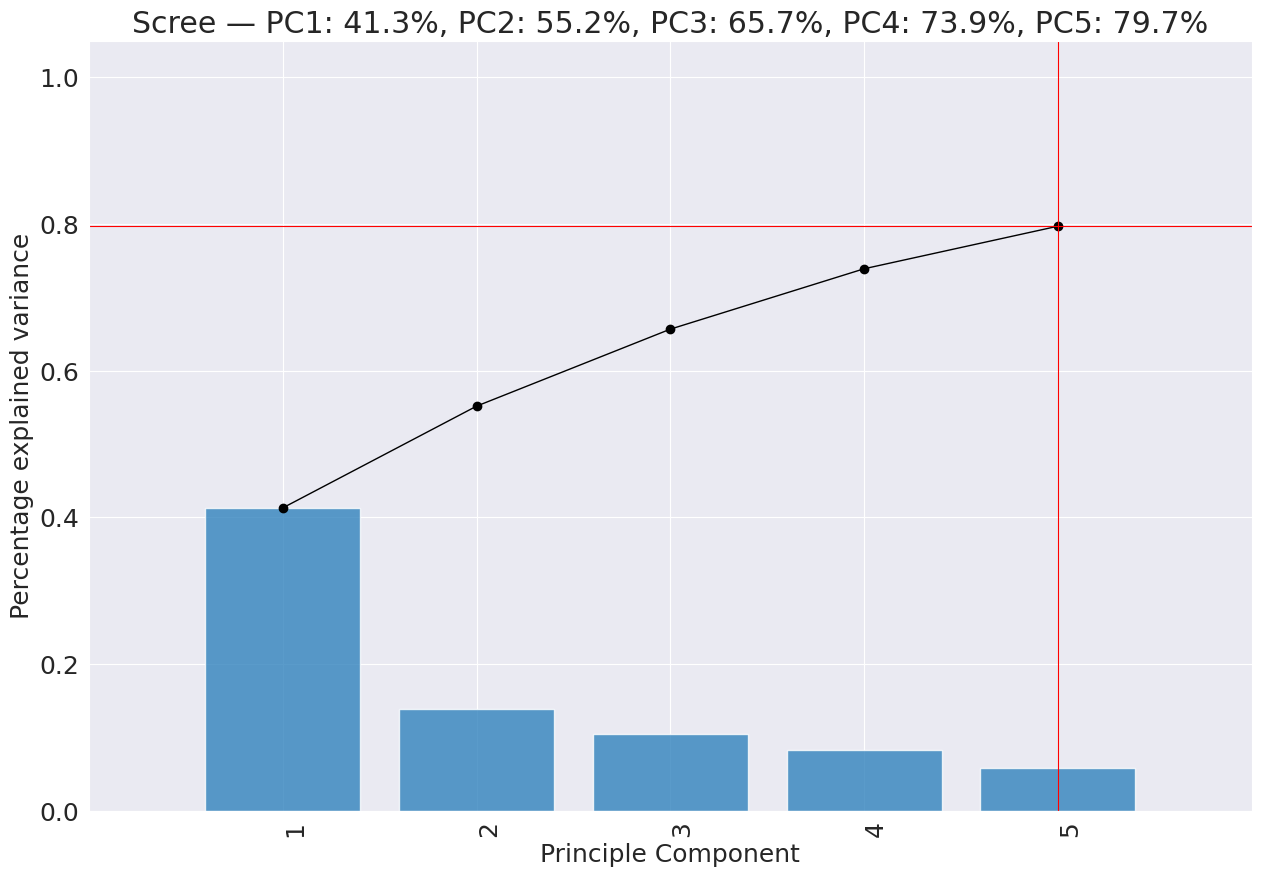

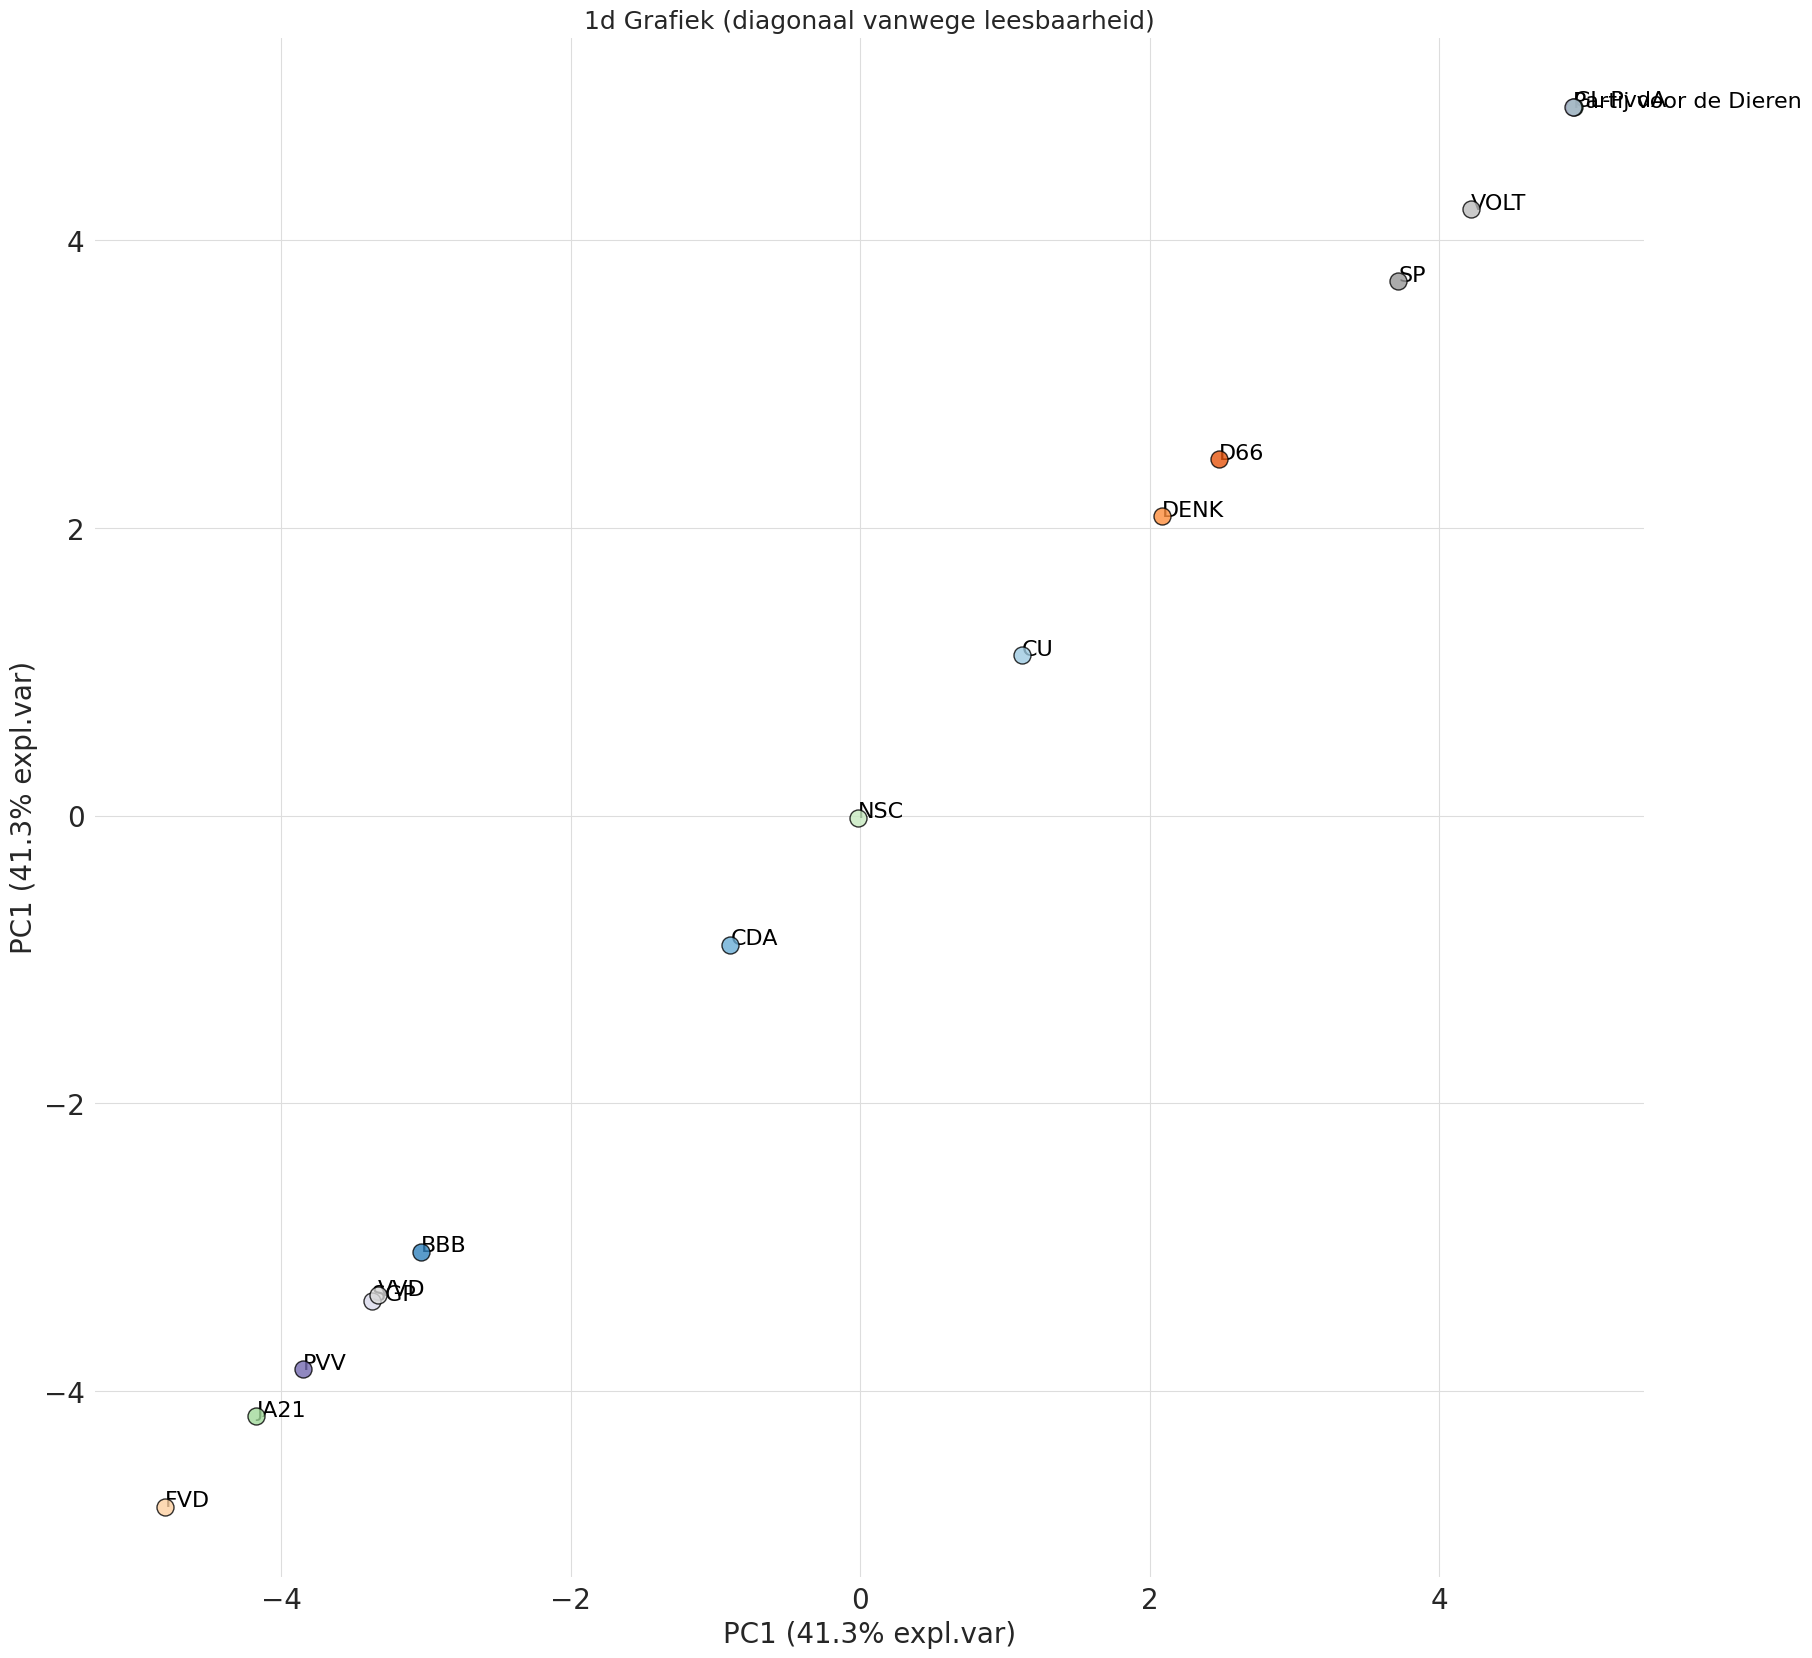

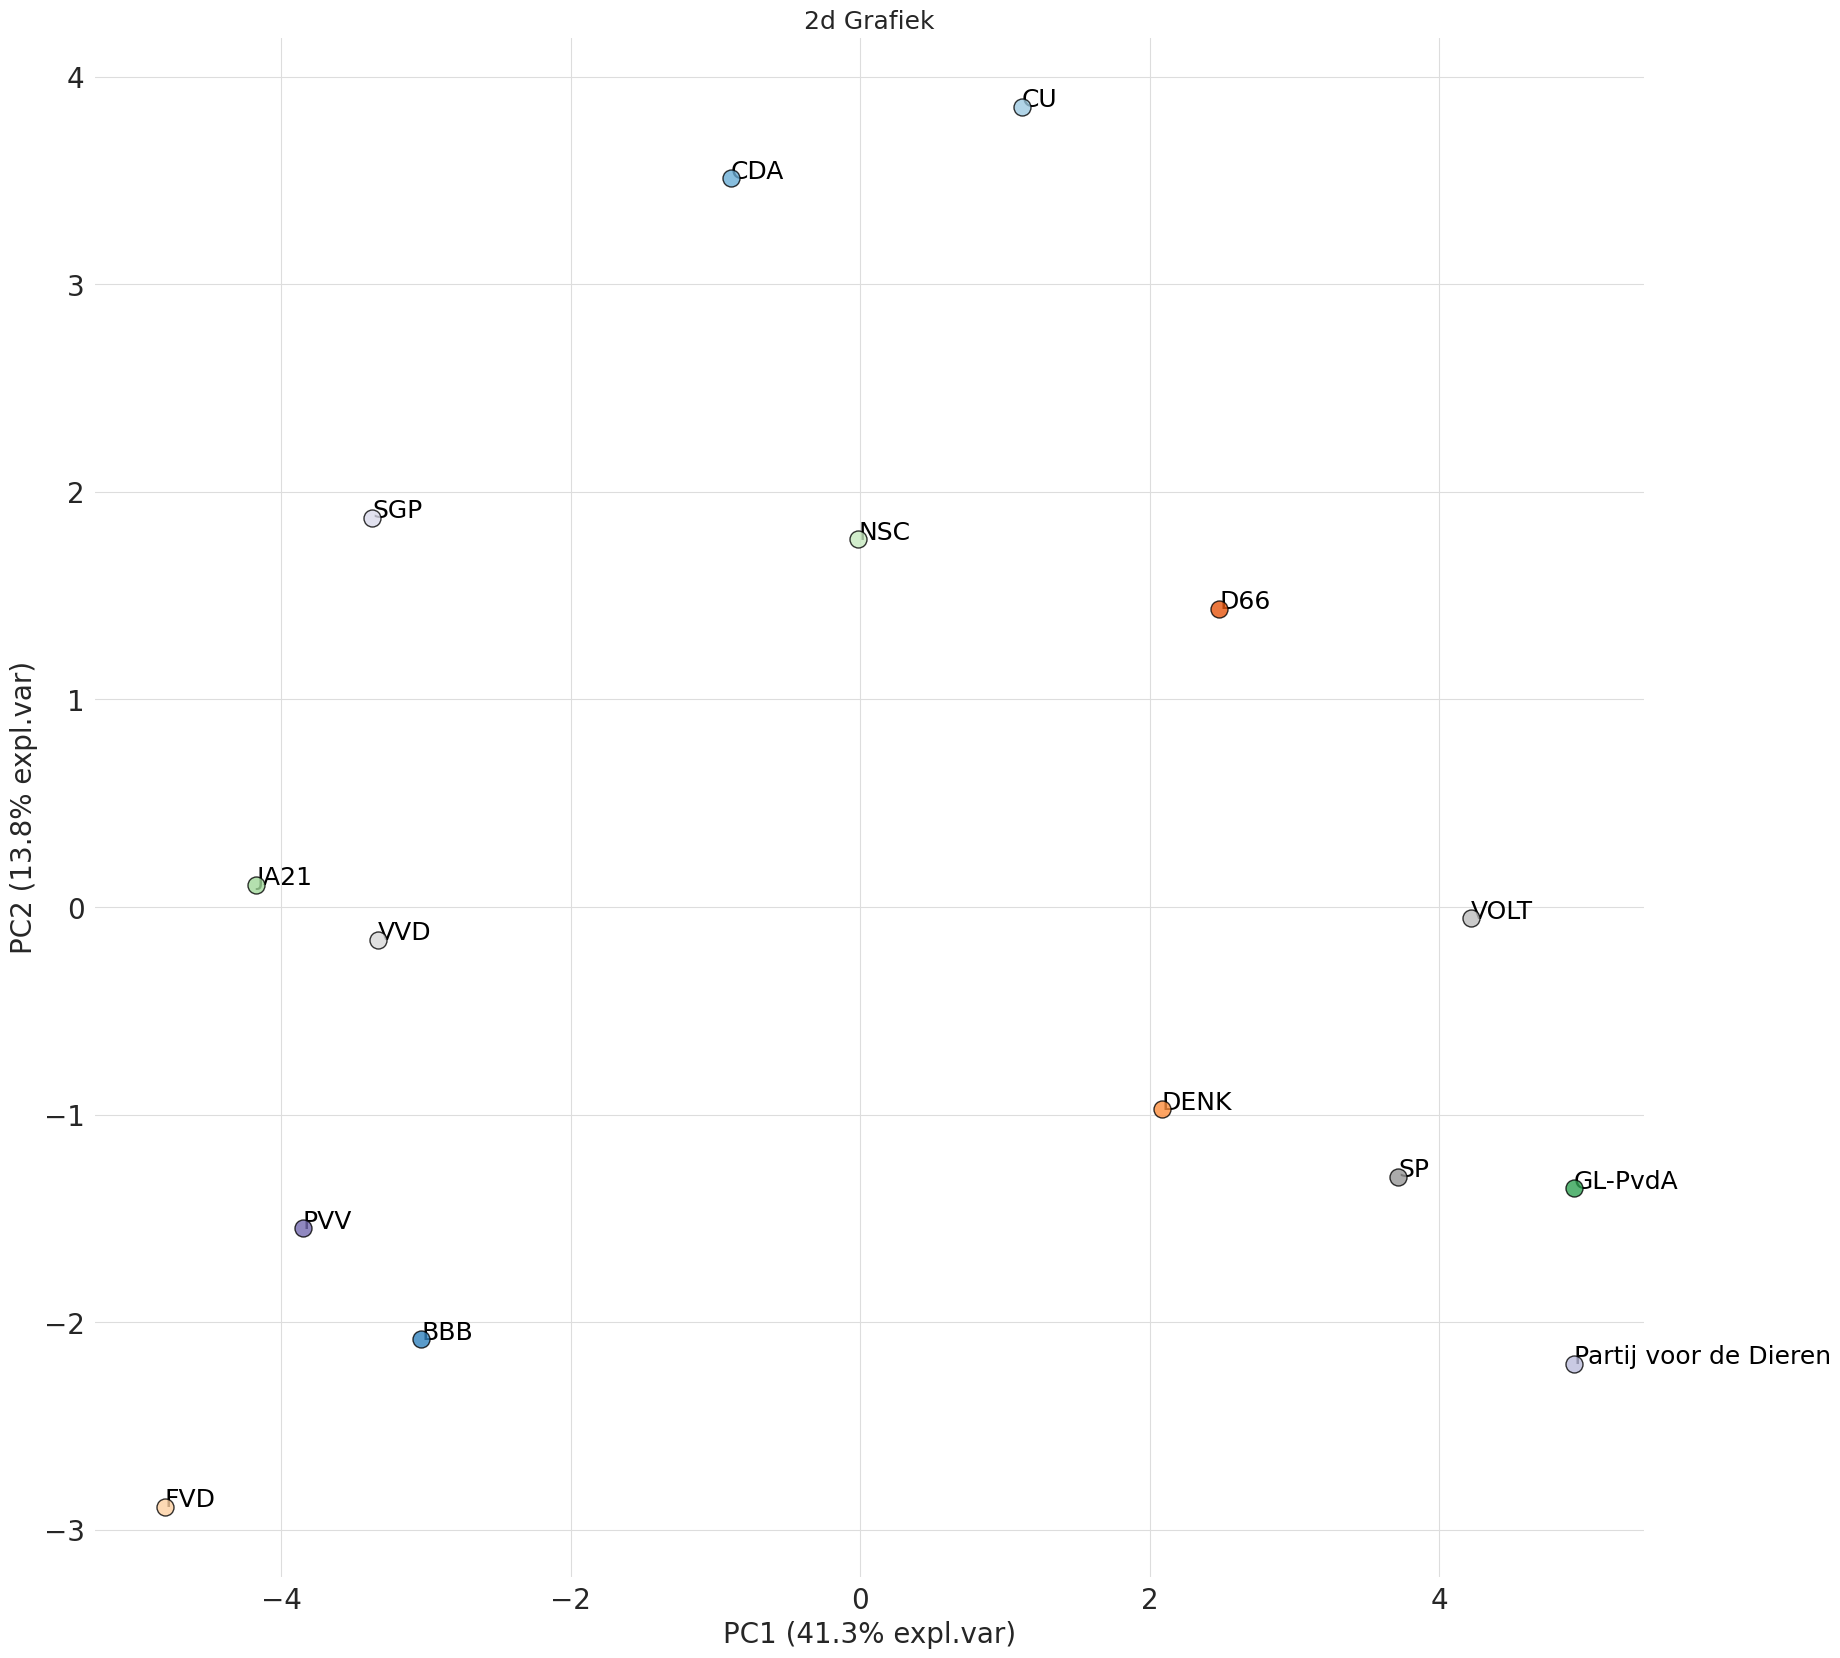

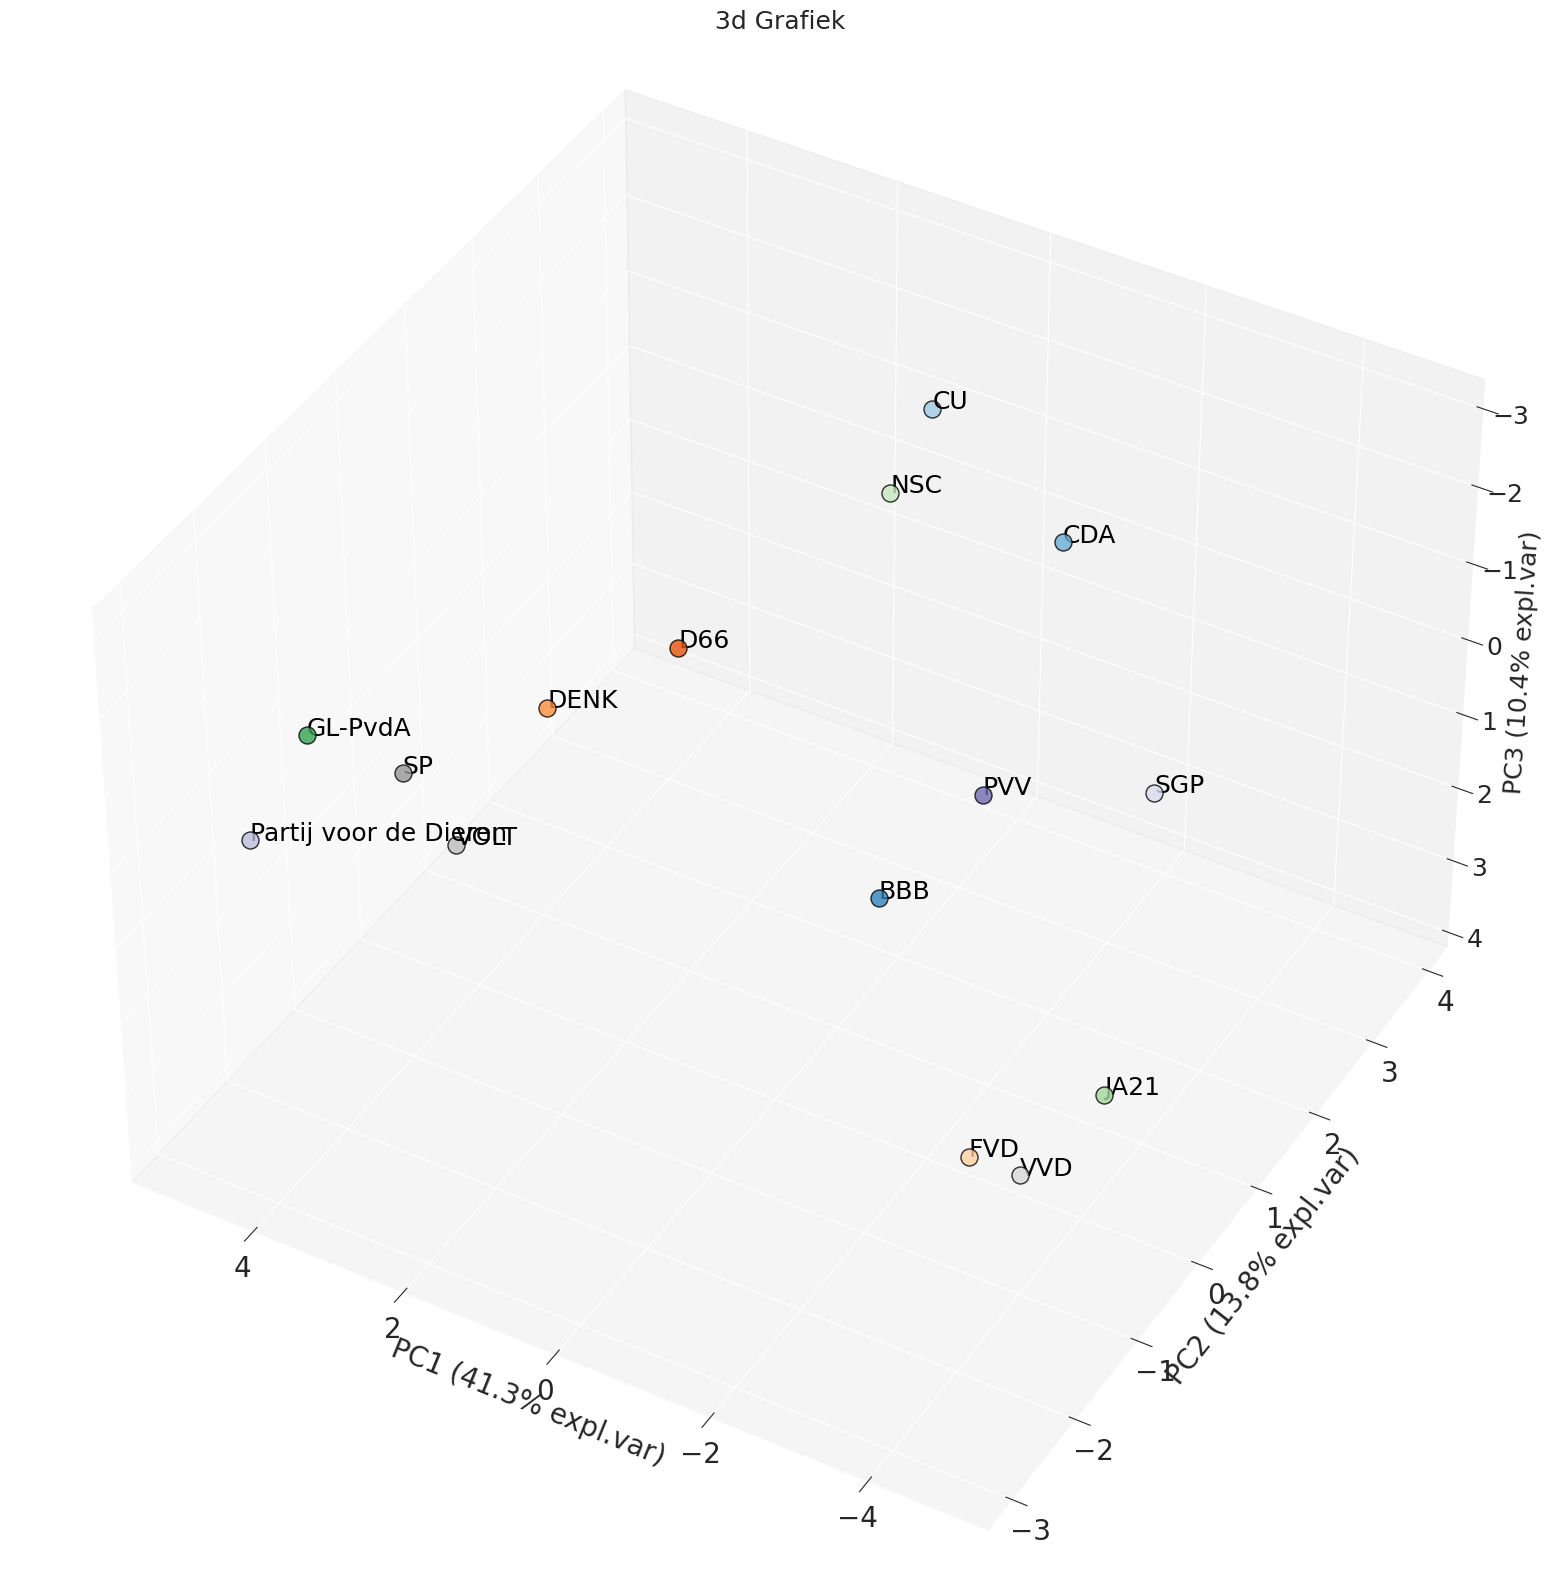

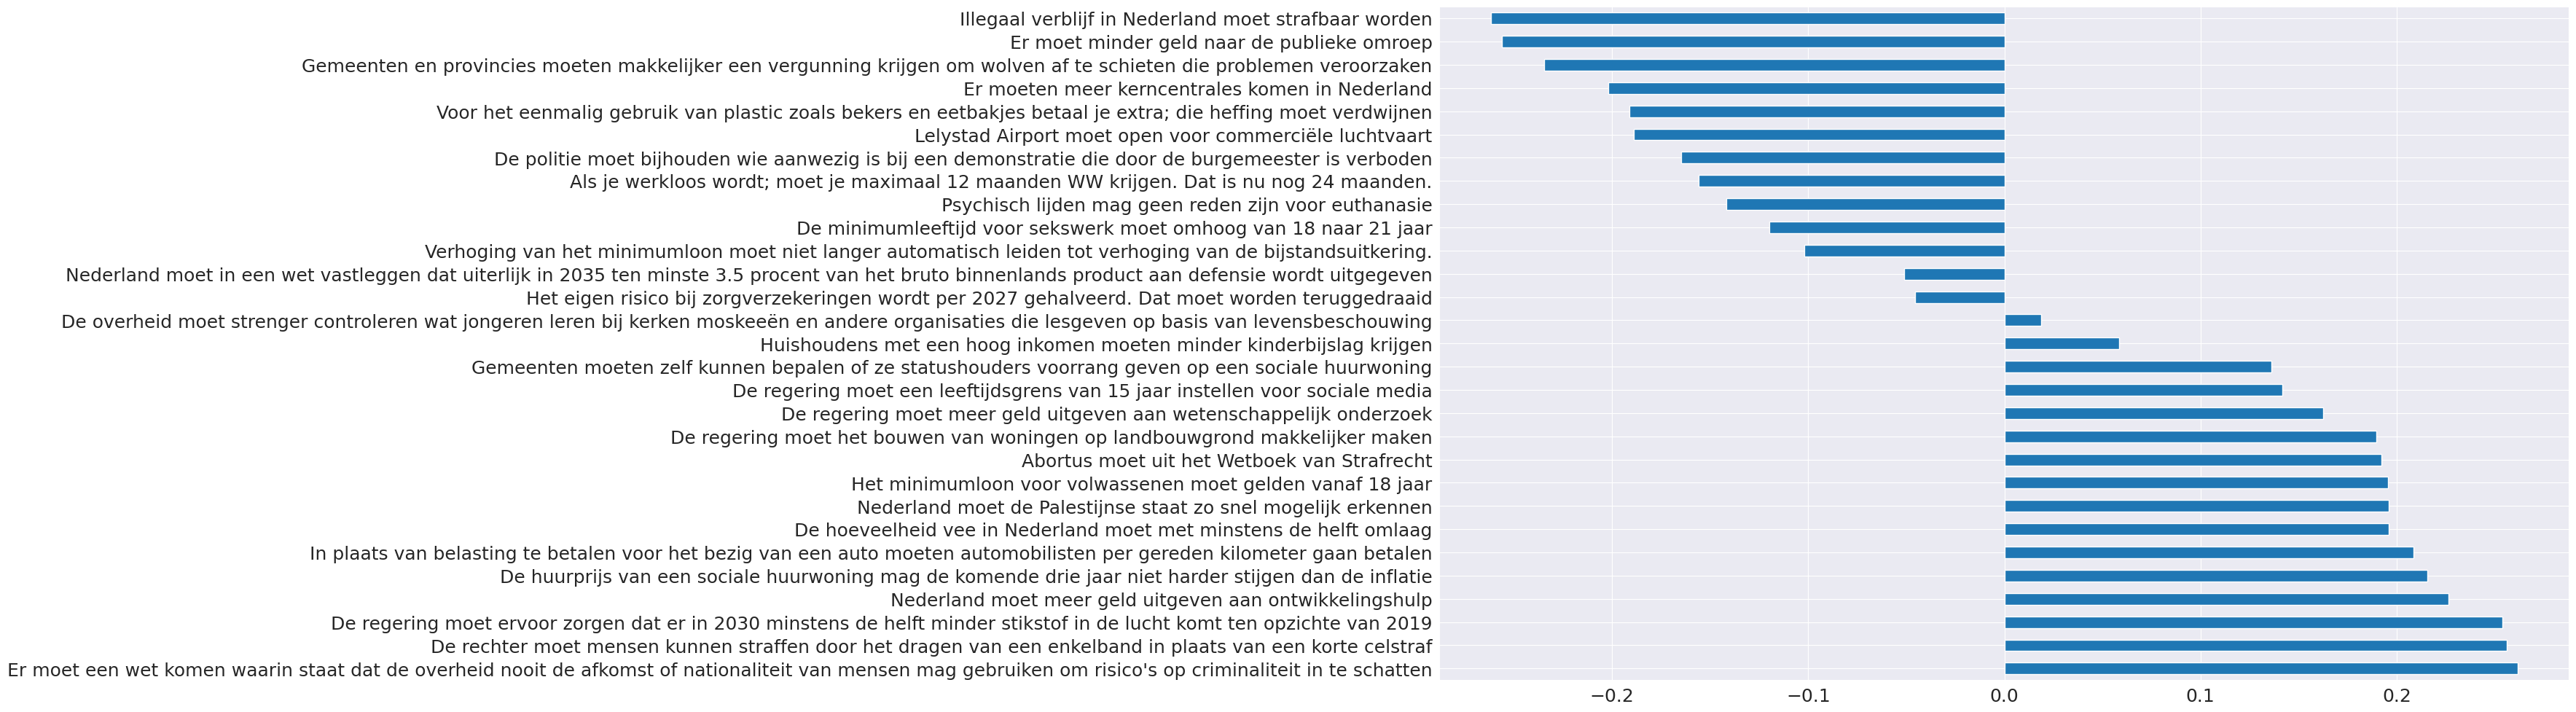

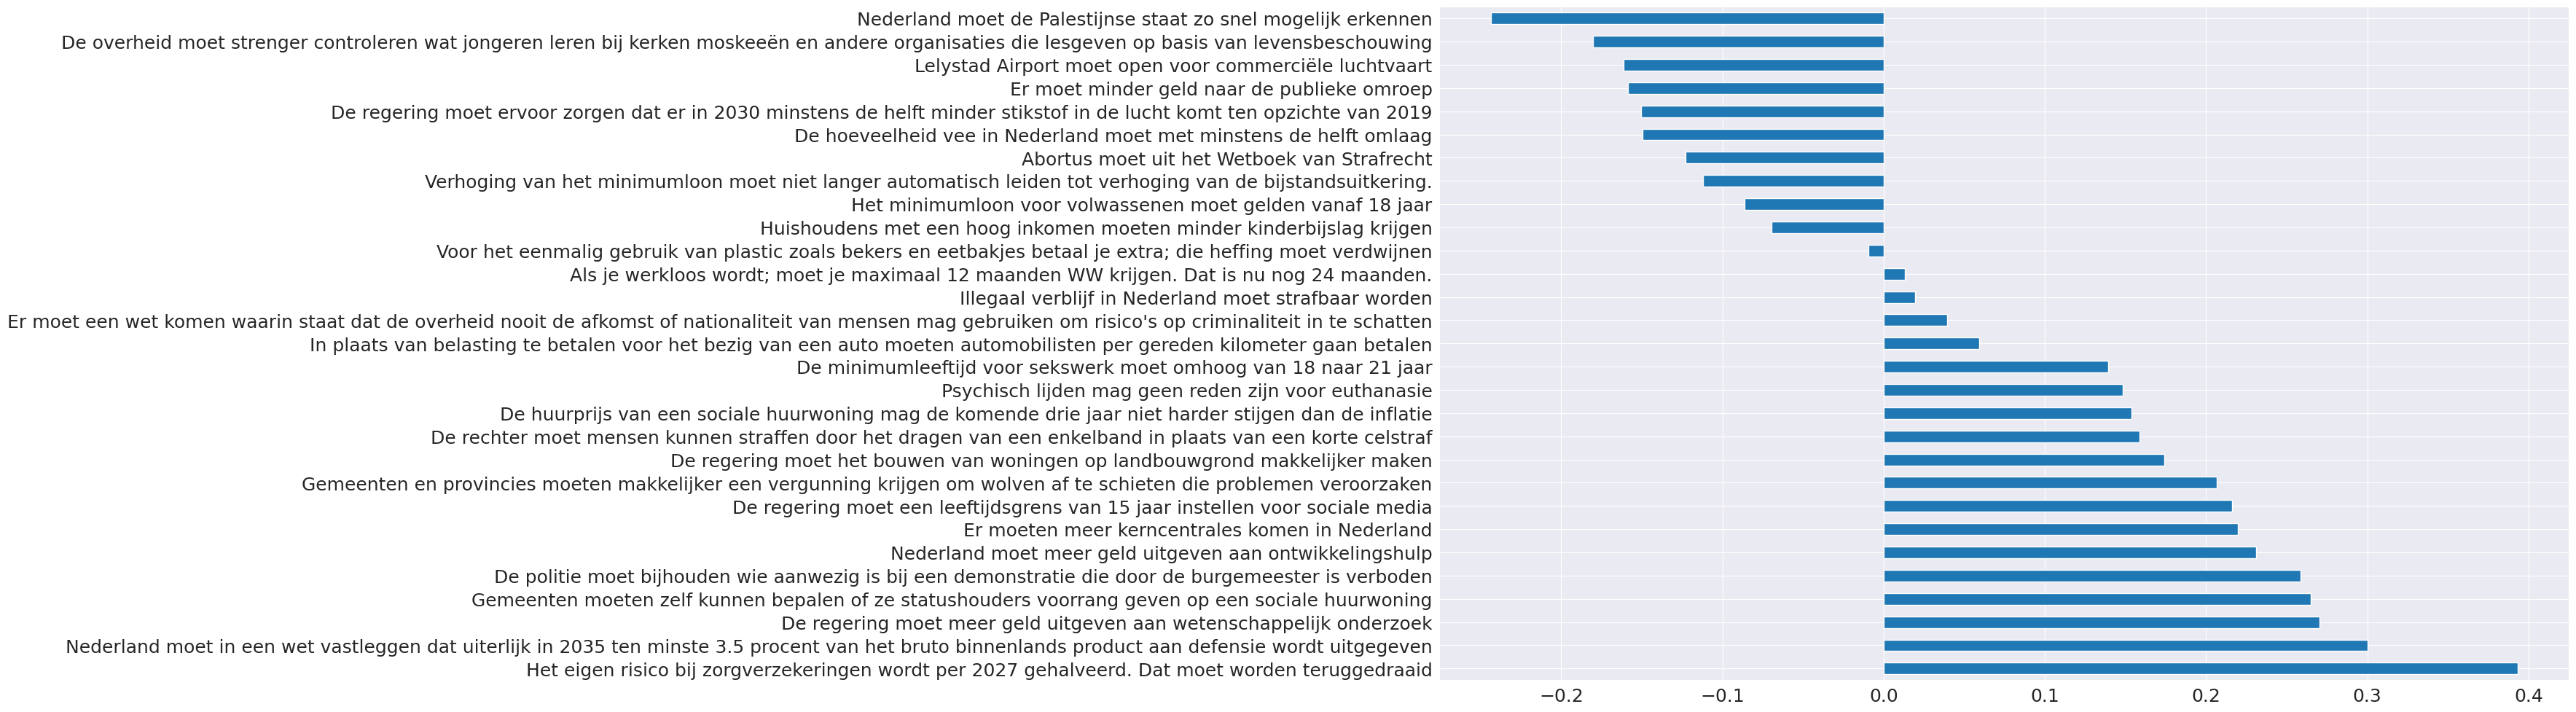

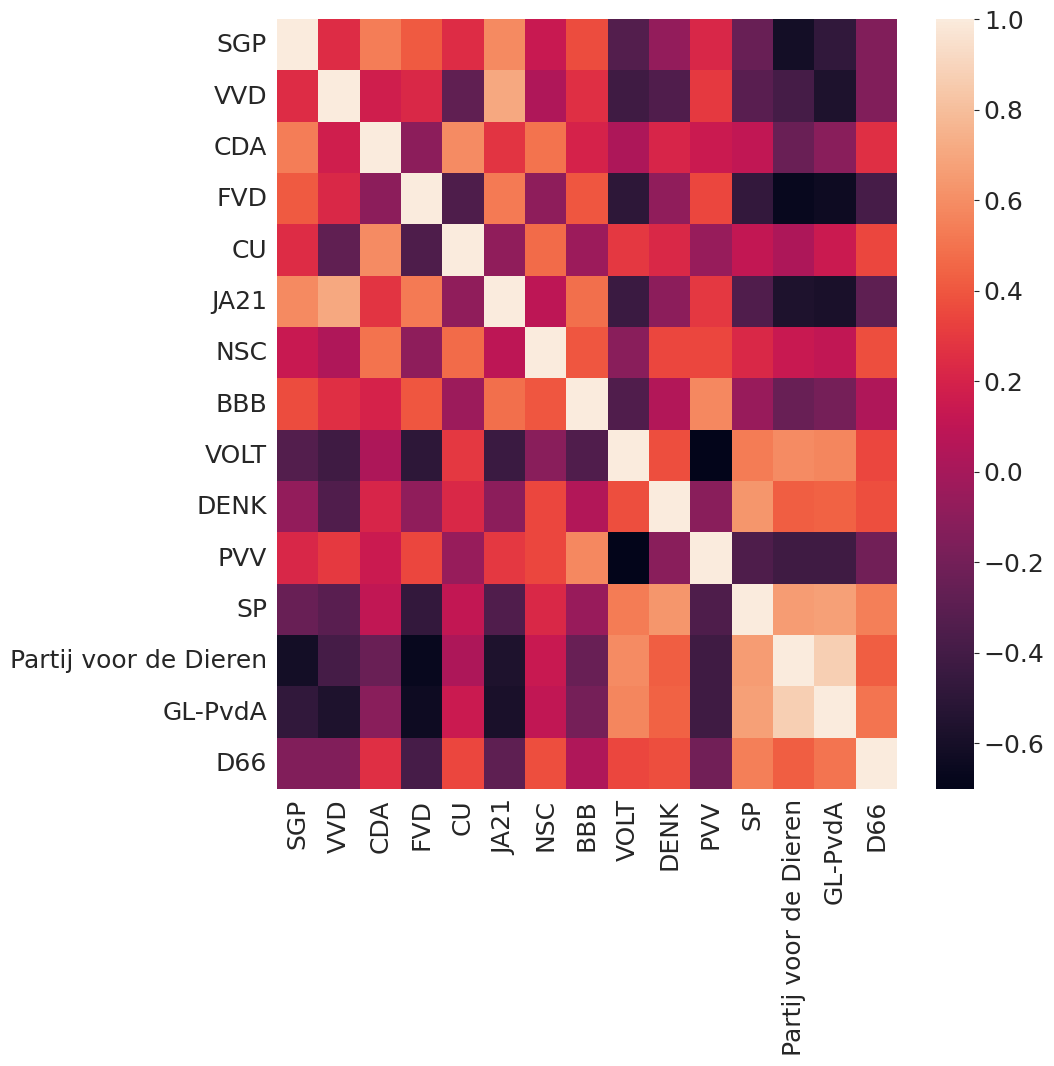

In [9]:
# Load data and prepare DataFrame for analysis
stemwijzer_df_prepared, stemwijzer_df, stemwijzer_df_labels = prepare_data(
    file_location='data/stemwijzer.csv',
    question_string="stelling (-1: mee oneens; 0=neutraal; 1 eens)"
)
run_analysis(stemwijzer_df, stemwijzer_df_prepared, stemwijzer_df_labels)
stemwijzer_df.corr()
